### Context
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

#### Matrix column entries (attributes):
name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot


In [3]:
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving Parkinsson disease.csv to Parkinsson disease.csv


In [4]:
data=pd.read_csv('Parkinsson disease.csv')

In [5]:
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [6]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

We can see from above that out of the 24 columns present in the dataset, there are 23 Numerical datatypes and 1 Categorical ones.

In [7]:
# describe data
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [8]:
# count number of rows
data.count()

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      195
MDVP:Jitter(Abs)    195
MDVP:RAP            195
MDVP:PPQ            195
Jitter:DDP          195
MDVP:Shimmer        195
MDVP:Shimmer(dB)    195
Shimmer:APQ3        195
Shimmer:APQ5        195
MDVP:APQ            195
Shimmer:DDA         195
NHR                 195
HNR                 195
status              195
RPDE                195
DFA                 195
spread1             195
spread2             195
D2                  195
PPE                 195
dtype: int64

In [9]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

There is no missing data as all the columns return 0.

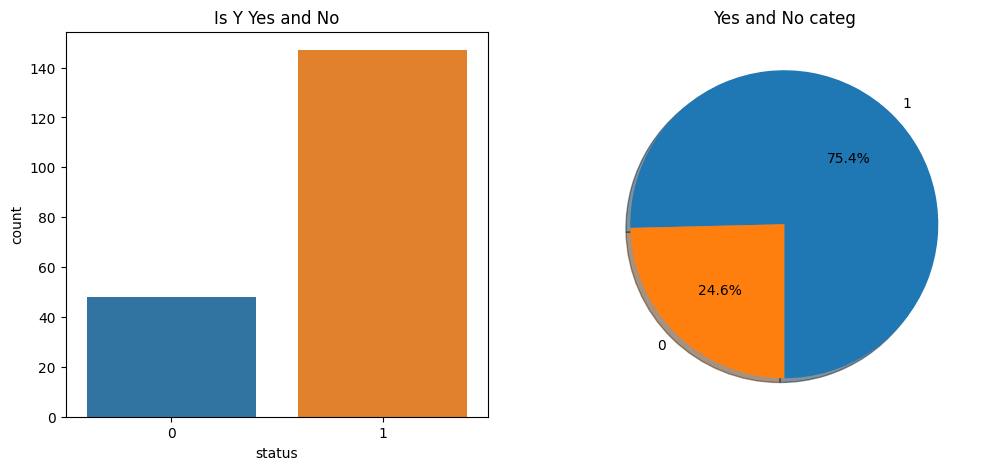

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='status',data=data)
plt.title("Is Y Yes and No")
plt.subplot(1,2,2)
labels =data['status'].value_counts(sort = True).index
sizes = data['status'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Yes and No categ',size = 12)
plt.show()

<ipython-input-11-b90eb90d9403>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


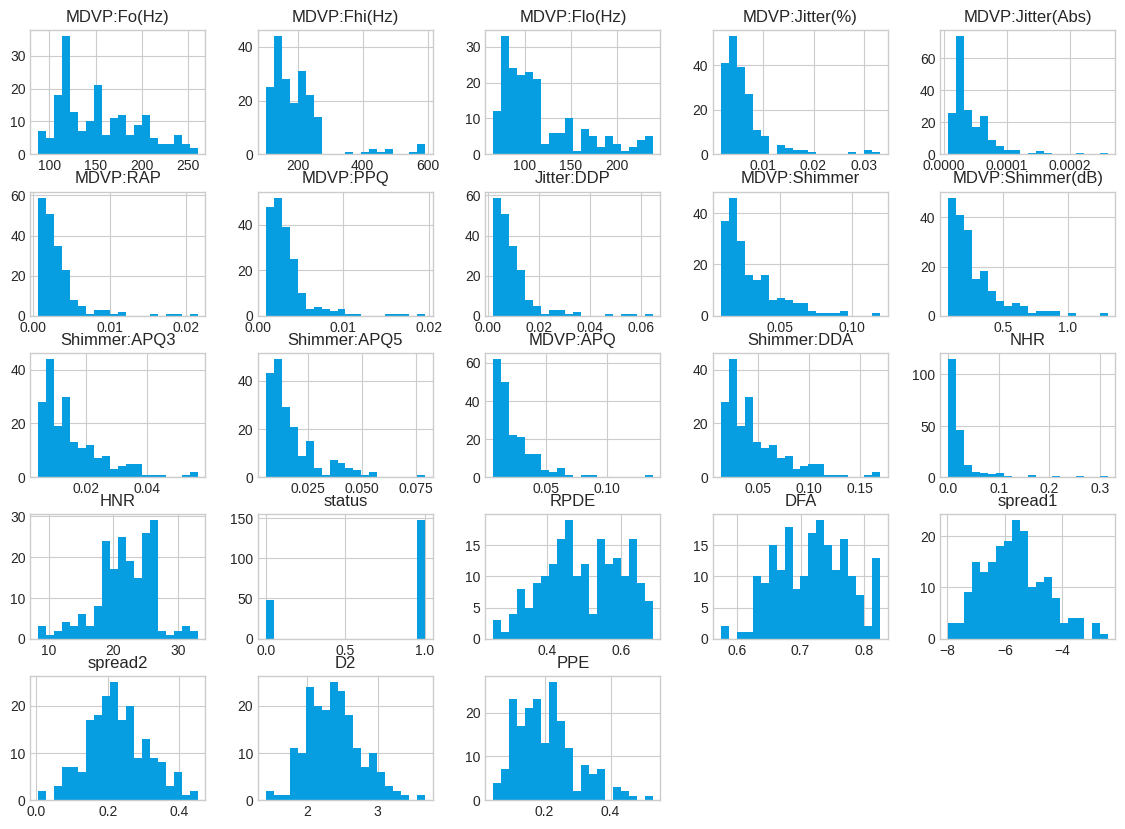

In [11]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<Figure size 800x500 with 0 Axes>

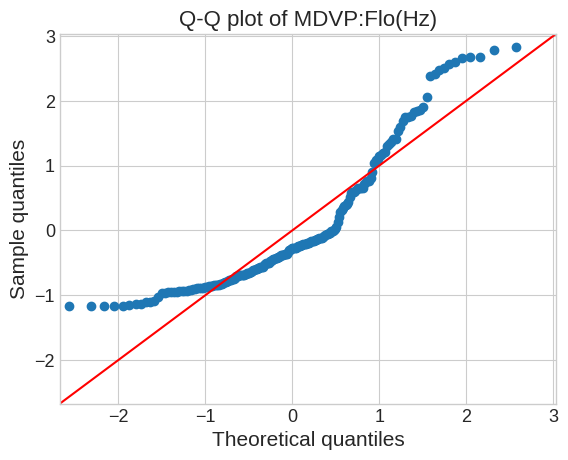

<Figure size 800x500 with 0 Axes>

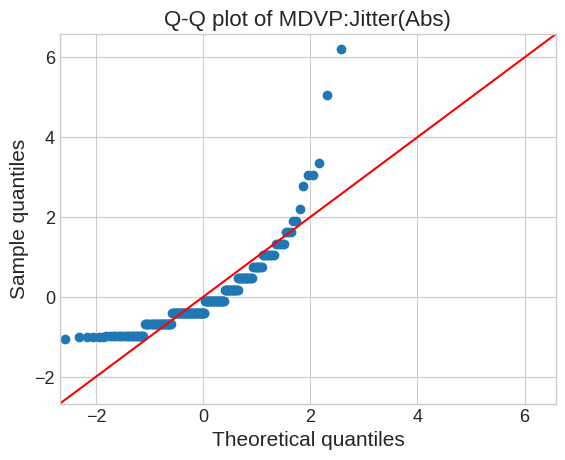

<Figure size 800x500 with 0 Axes>

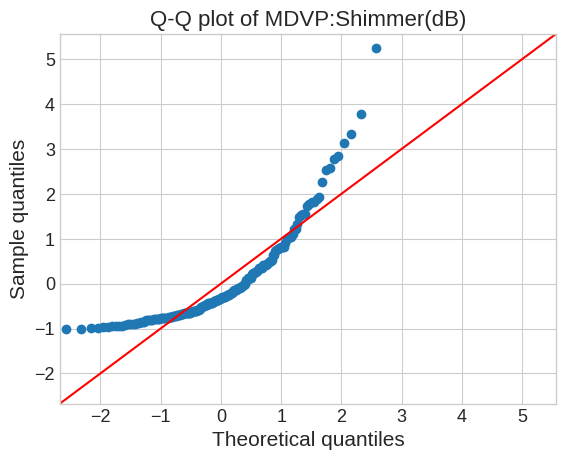

<Figure size 800x500 with 0 Axes>

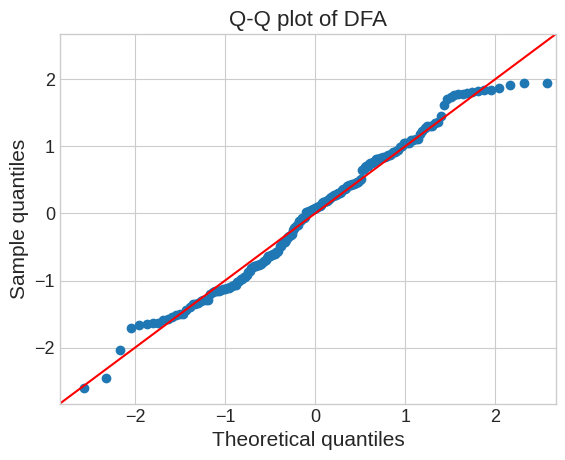

<Figure size 800x500 with 0 Axes>

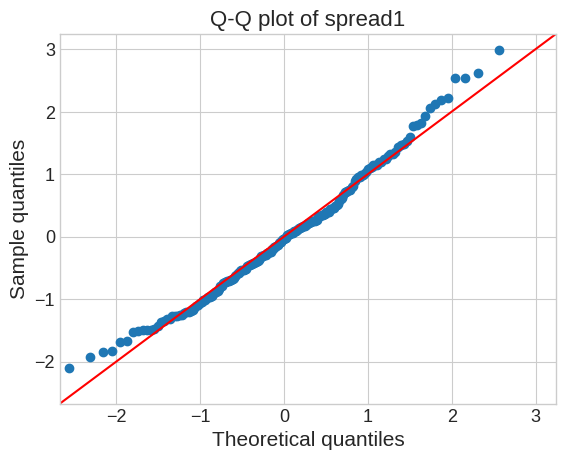

In [12]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)', 'MDVP:Shimmer(dB)', 'DFA', 'spread1']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)

Looking at the q-q plots above, it appears that all independent variables are roughly following normal distribution.
The Q-Q plots of MDVP: Flo(Hz) and MDVP: Jitter(Abs) show outliers

### Feature Selection Process
Now that we have our dummy data ready, we can start working on Feature selection techniques, and for that we going to use 3 different ways to find Features:

Pearson's correlation<br>
K Best features<br>
Sequential feature selection

#### Pearson's Correlation
The Pearson's correlation measures the strength of linear relationship between 2 variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation and +1 meaning a total positive correlation.

#### K Best features
The SelectKBest method select the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data.Selecting best features is important process when we prepare a large dataset for training.

#### Sequential feature selection
This Sequential Feature Selector adds (forward selection) or removes (backward selection) features to form a feature subset in a greedy fashion. At each stage, this estimator chooses the best feature to add or remove based on the cross-validation score of an estimator

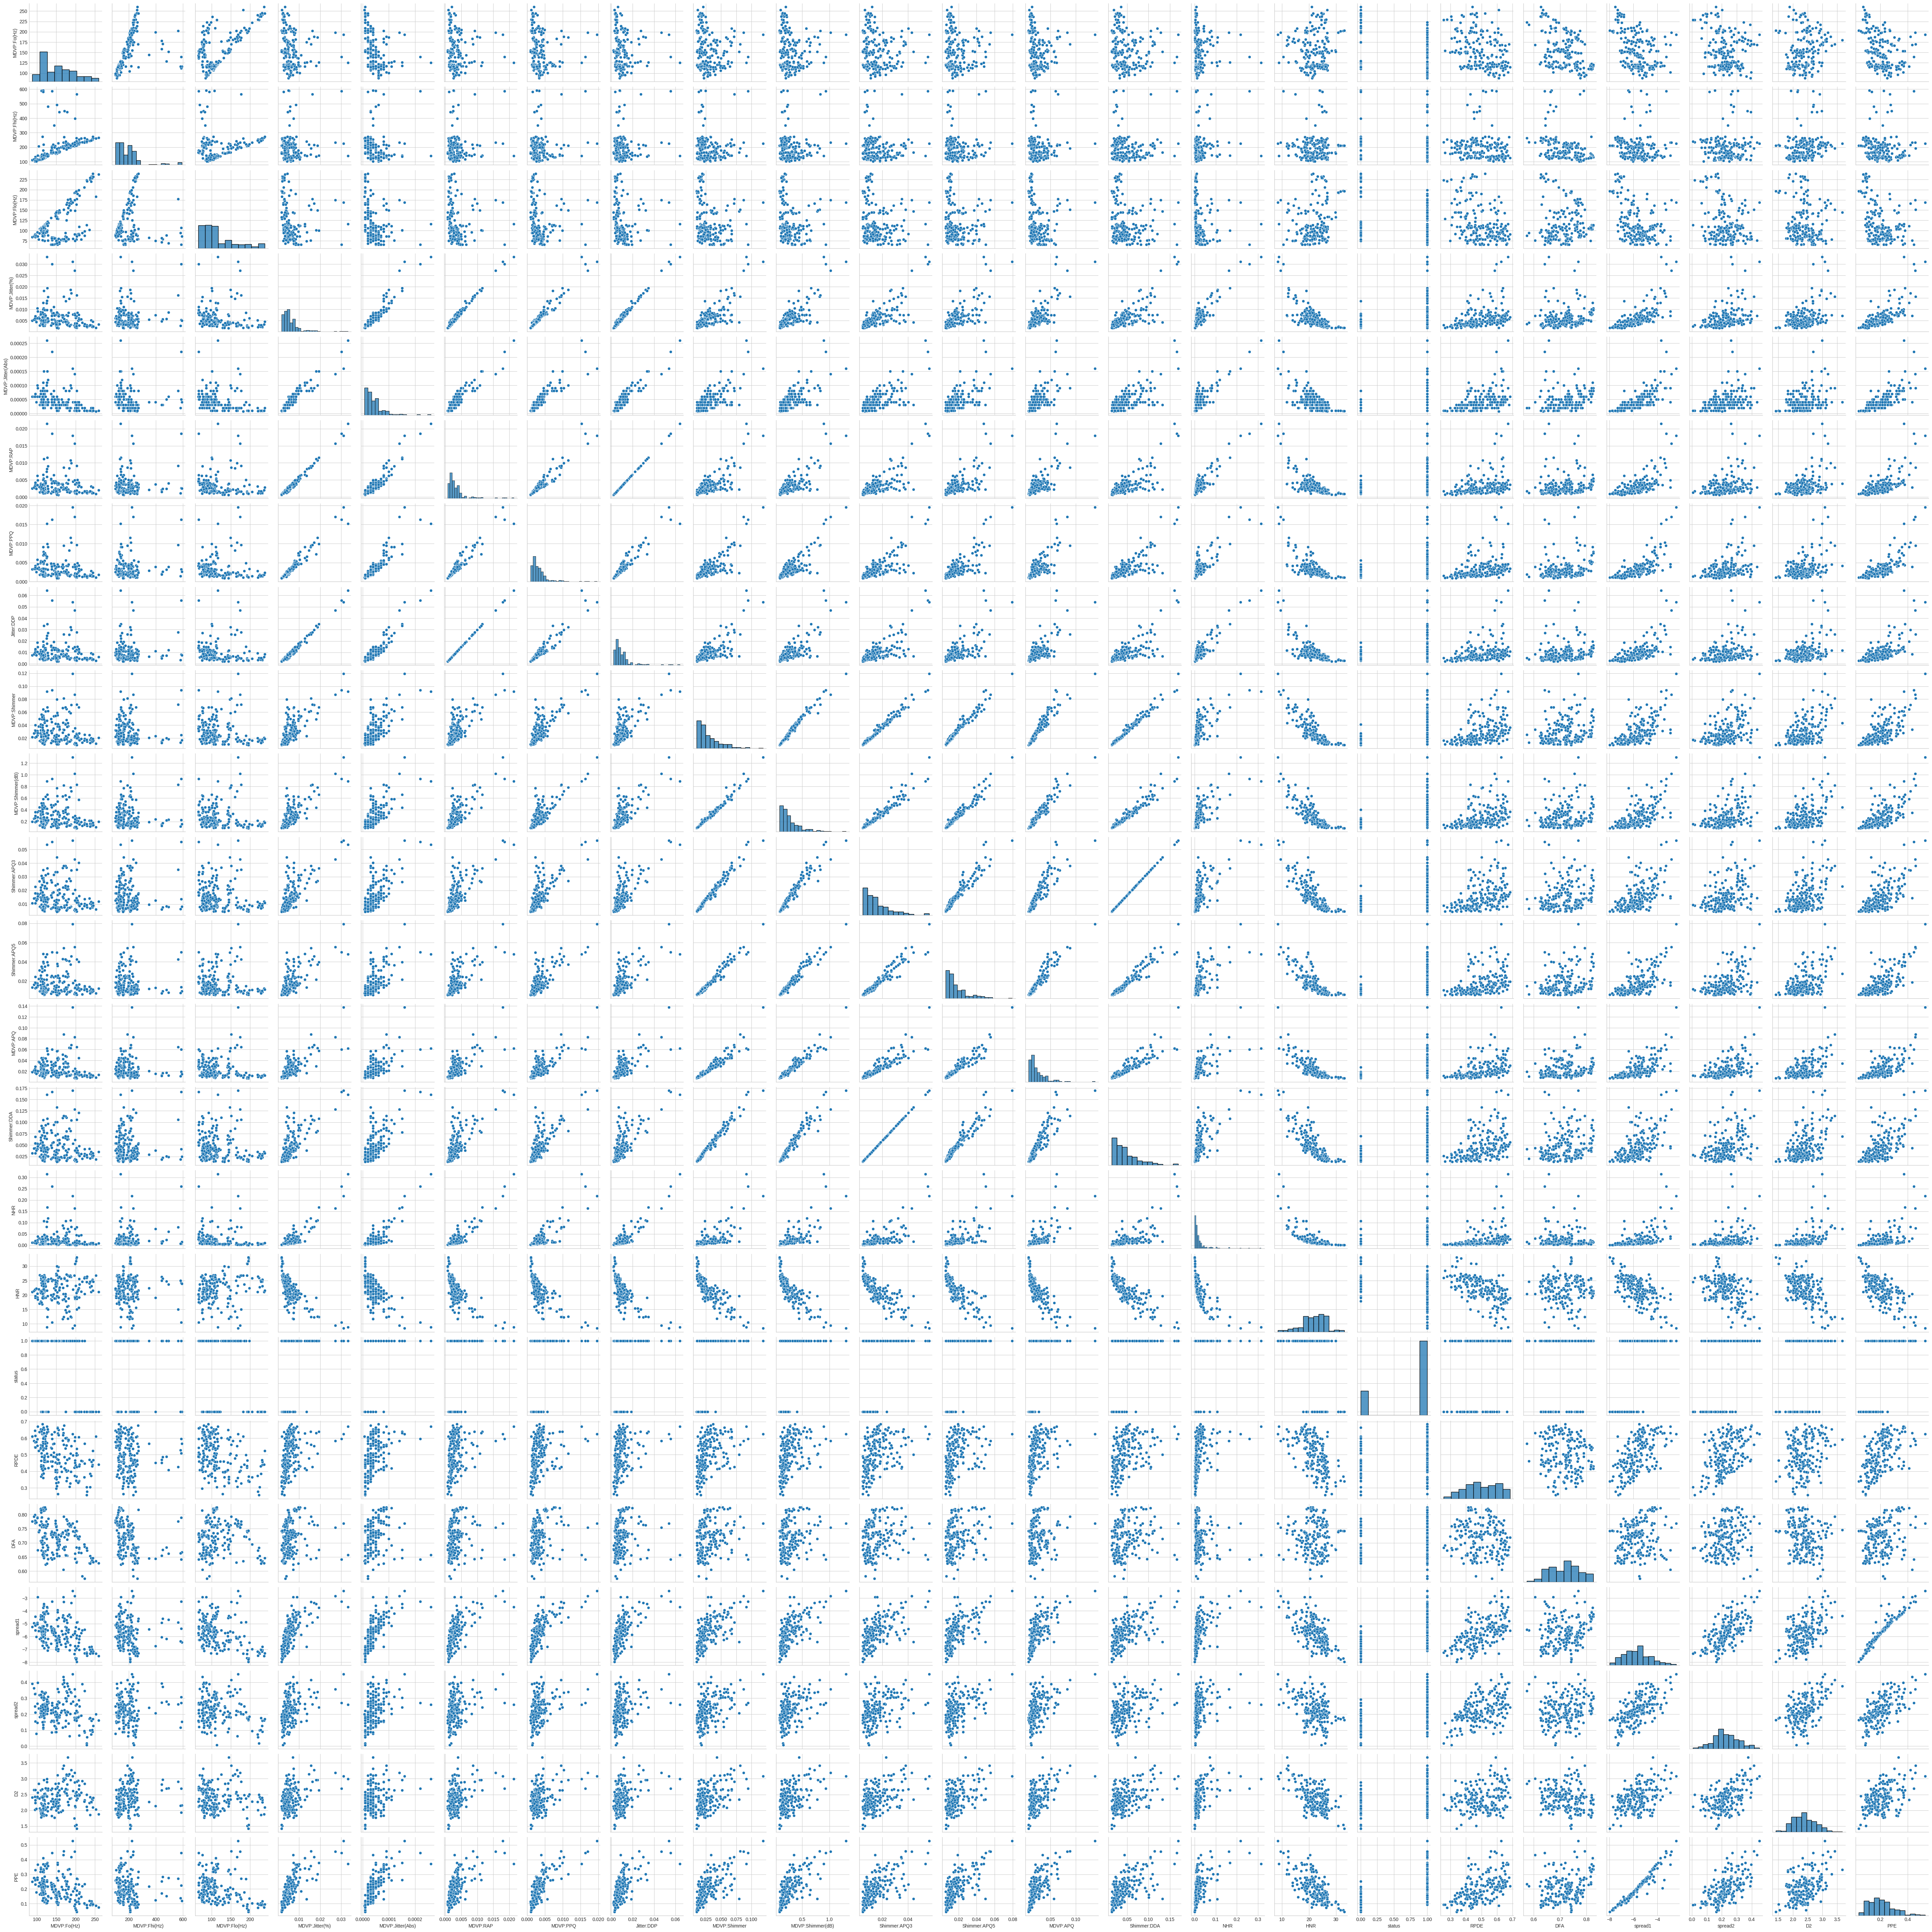

In [13]:
# Now we check the colinearity between the columns
sns.pairplot(data)

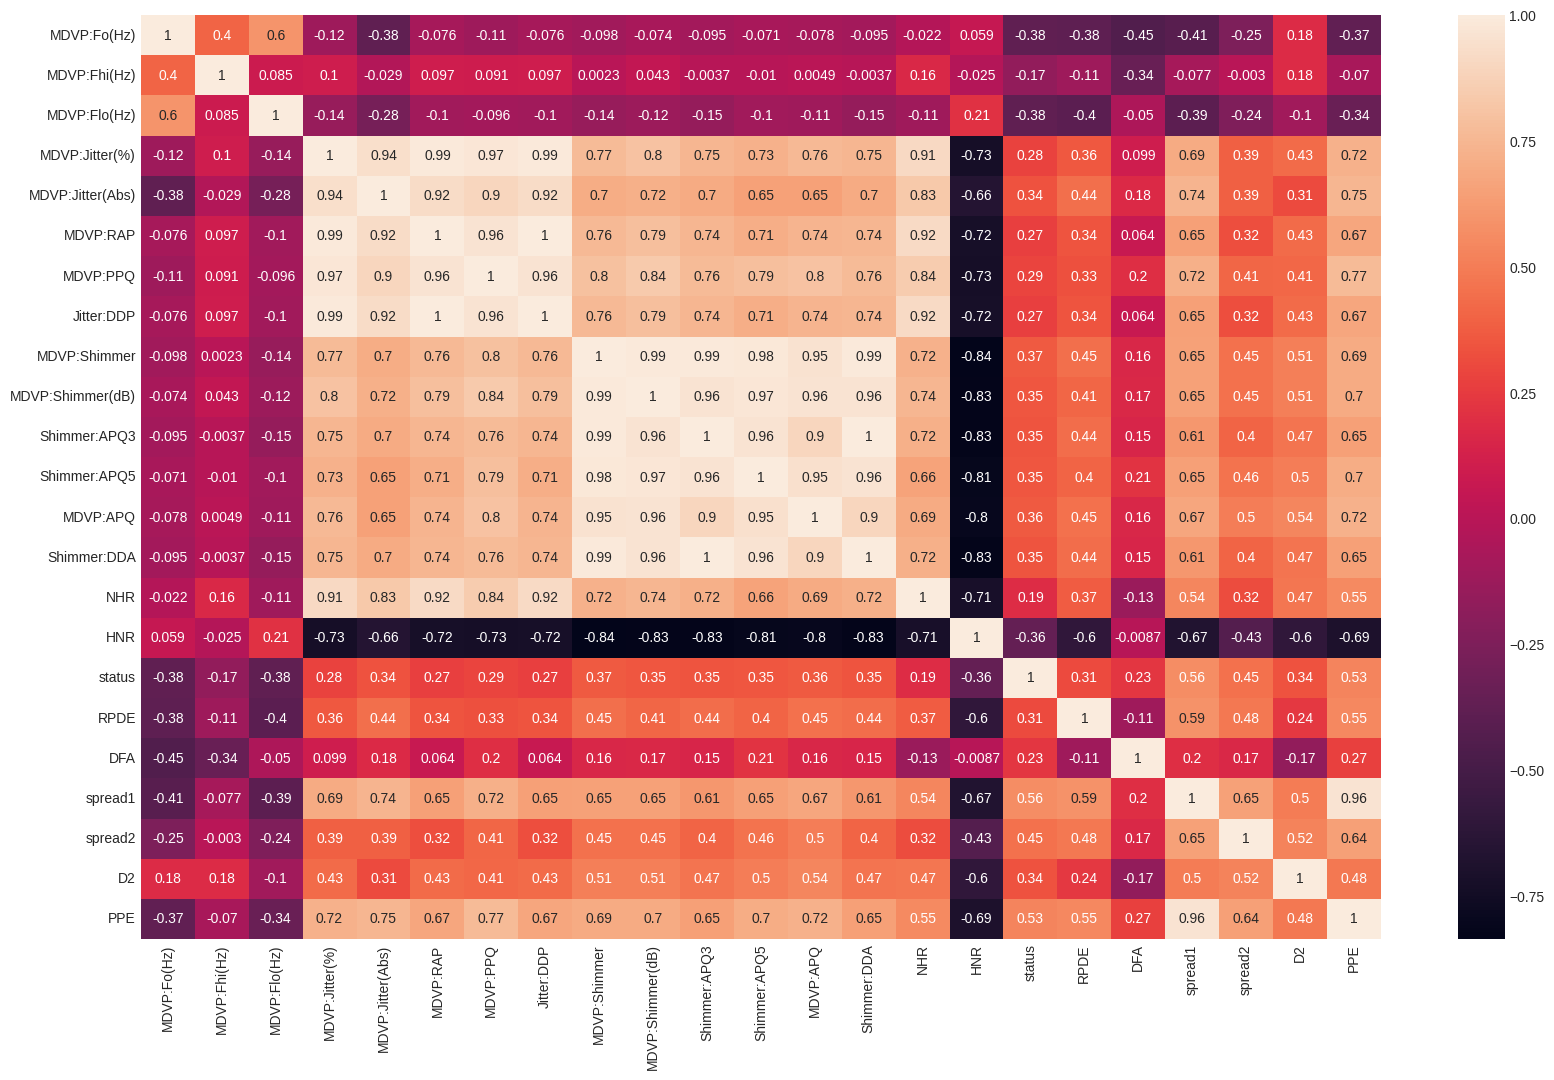

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(20,12))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [15]:
# Dependency correlation with Status column
data.corr()['status'].sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)       -0.166136
HNR                -0.361515
MDVP:Flo(Hz)       -0.380200
MDVP:Fo(Hz)        -0.383535
Name: status, dtype: float64

In [16]:
dummy_data = data
drop_cols = ['Shimmer:APQ5', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:DDA', 'D2', 'MDVP:Jitter(Abs)', 'RPDE', 'MDVP:PPQ', 'MDVP:Jitter(%)', 'MDVP:RAP', 'Jitter:DDP', 'DFA', 'NHR', 'MDVP:Fhi(Hz)', 'HNR', 'MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'name']
dummy_data_with_corr = dummy_data.drop(drop_cols, axis=1)
dummy_data_with_corr.head()

MDVP:Shimmer  MDVP:APQ  status   spread1   spread2       PPE
0       0.04374   0.02971       1 -4.813031  0.266482  0.284654
1       0.06134   0.04368       1 -4.075192  0.335590  0.368674
2       0.05233   0.03590       1 -4.443179  0.311173  0.332634
3       0.05492   0.03772       1 -4.117501  0.334147  0.368975
4       0.06425   0.04465       1 -3.747787  0.234513  0.410335

In [17]:
dummy_data_with_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Shimmer  195 non-null    float64
 1   MDVP:APQ      195 non-null    float64
 2   status        195 non-null    int64  
 3   spread1       195 non-null    float64
 4   spread2       195 non-null    float64
 5   PPE           195 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.3 KB


#### **Through Pearson's Correlation we got the following output:**
Columns shown in above table are the features that we are gonna use to predict the status of disease

### Now we find the features through KBest
The algorithm is simple: we simply provide a method of calculating the importance of a feature and the number of features we want to use, denoted as k. Then, the algorithm simply returns the top k features.
The main advantage of this method is that we are free to choose among a variety of ways to compute the importance of a feature.
Here, we use the chi squared test, as we are working with a classification task.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier(random_state=42)

# First we make dummy data from original data
dummy_data_v2 = data
dummy_data_v2 = dummy_data_v2.drop(['name', 'spread1'], axis=1)

# Make Testing and Training Data
X = dummy_data_v2.drop(['status'], axis=1)
y = dummy_data_v2['status']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    stratify=y, 
                                                    random_state=42)
# Make copy of this Test Data
X_train_v1, X_test_v1, y_train_v1, y_test_v1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

f1_score_list = []

for k in range(1, 22):
    selector = SelectKBest(chi2, k=k)
    selector.fit(X_train_v1, y_train_v1)
    
    sel_X_train_v1 = selector.transform(X_train_v1)
    sel_X_test_v1 = selector.transform(X_test_v1)
    
    dt.fit(sel_X_train_v1, y_train_v1)
    kbest_preds = dt.predict(sel_X_test_v1)
    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)
    f1_score_list.append(f1_score_kbest)
  
print(f1_score_list)

[0.729, 0.755, 0.827, 0.827, 0.85, 0.846, 0.846, 0.85, 0.801, 0.801, 0.823, 0.846, 0.801, 0.846, 0.801, 0.801, 0.778, 0.846, 0.801, 0.801, 0.846]


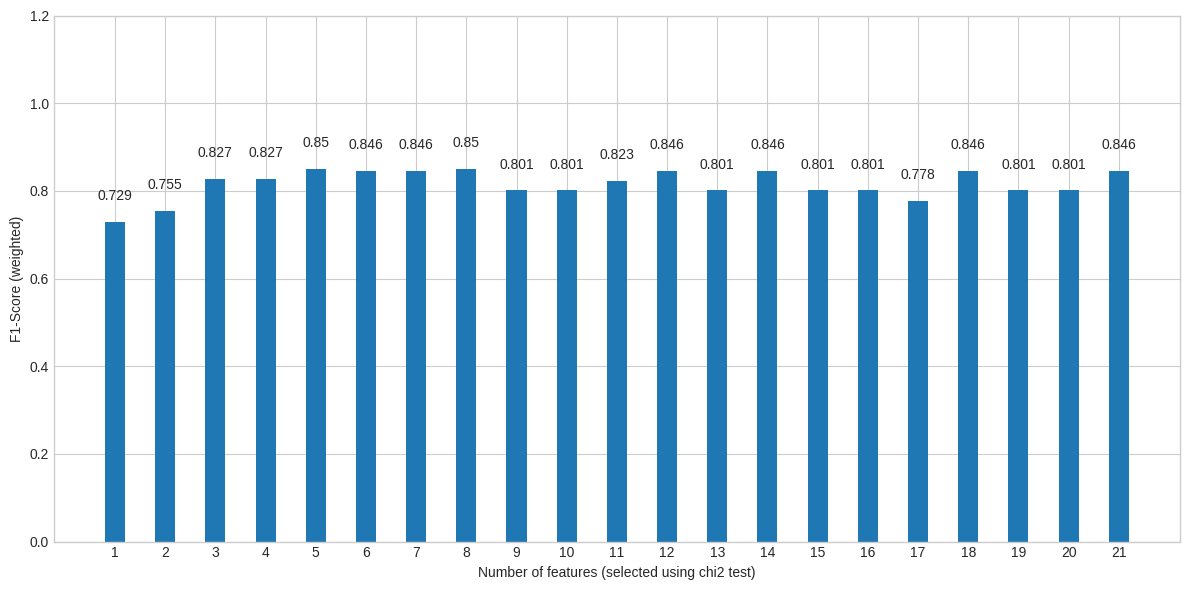

In [19]:
# We can now plot the F1-score for each number of variables used in the model:
fig, ax = plt.subplots(figsize=(12, 6))
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13', '14', '15', '16', '17', '18', '19', '20', '21']
y = f1_score_list
ax.bar(x, y, width=0.4)
ax.set_xlabel('Number of features (selected using chi2 test)')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.05, s=str(value), ha='center')
    
plt.tight_layout()

The above observation shows that when we use top 8 features then we get the best score which is of 0.85 . But this increases our features dependencies, so let's test with some other test than "chi squared test" to check the validation such as f_classif which returns the number of best features we want, or maybe we get some improved results.

In [20]:
X_new = dummy_data_v2.drop(['status'], axis=1)
Y_new = dummy_data_v2['status']

# Create and fit selector
selector = SelectKBest(f_classif, k=4)
selector.fit(X_new, Y_new)

# Now selector will take the best featured columns
cols = selector.get_support(indices=True)
new_feature_data = X_new.iloc[:,cols]
print(new_feature_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo(Hz)   195 non-null    float64
 1   MDVP:Flo(Hz)  195 non-null    float64
 2   spread2       195 non-null    float64
 3   PPE           195 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB
None


In [21]:
new_feature_data['status'] = Y_new
new_feature_data.head()

<ipython-input-21-9d48c00e9d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feature_data['status'] = Y_new


MDVP:Fo(Hz)  MDVP:Flo(Hz)   spread2       PPE  status
0      119.992        74.997  0.266482  0.284654       1
1      122.400       113.819  0.335590  0.368674       1
2      116.682       111.555  0.311173  0.332634       1
3      116.676       111.366  0.334147  0.368975       1
4      116.014       110.655  0.234513  0.410335       1

#### Through the KBest features method, we got the following output:
Columns shown in above table are the features that we can use to predict the status of disease. The only difference here we got from the Pearson's correlation model is that we decided to drop "MDVP:Shimmer", "MDVP:APQ" column and consider "MDVP:Fo(Hz)" and "MDVP:Flo(Hz)" as our feature.

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

X_v2 = dummy_data_v2.drop(['status'], axis=1)
y_v2 = dummy_data_v2[['status']]
y_v2 = y_v2.values.ravel()

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, y_v2, test_size=0.2, random_state=42, stratify=y_v2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_v2)
X_test = scaler.transform(X_test_v2)

In [23]:
%pip install mlxtend
%pip install eli5
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=47c4d66b8b50cacb1bfe63d2bec944369ce0f16c46f52ee78c6f9c6ec2d88787
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [24]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(solver='lbfgs', max_iter=1000),
          k_features='best',
          forward=True,
          floating=False,
          scoring = 'precision',
          cv = 0)
sfs.fit(X_v2, y_v2)
sfs.k_feature_names_ 

('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE')

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


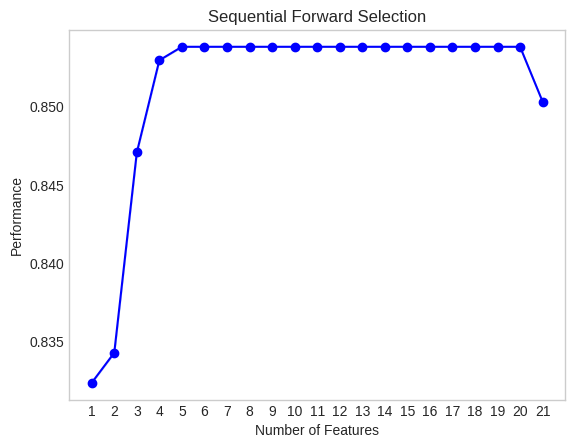

In [25]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

#### Through the SequentialFeatureSelector features method, we got the following output:
This method provided just 5 columns to be more relevant to our Learning model i.e. 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE'

## Indentifying predictor Significance

In [26]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(dummy_data['status'], dummy_data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 status   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                              204.5
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                    1.91e-74
Time:                        02:23:12   Log-Likelihood:                         -68.451
No. Observations:                 195   AIC:                                      146.9
Df Residuals:                     190   BIC:                                      163.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
MDVP:Fo(Hz)     -0.0019      0.001     -2.043      0.042      -0.004   -6.61e-05
MDVP:Fhi(Hz)    -0.0004      0.000     -1.350      0.179      -0.001       0.000
MDVP:Flo(Hz)    -0.0008      0.001     -1.088      0.278      -0.002       0.001
D2               0.3840      0.067      5.733      0.000       0.252       0.516
PPE              1.4611      0.372      3.933      0.000       0.728       2.194
==============================================================================
Omnibus:                       14.817   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.507
Skew:                          -0.613   Prob(JB):                     0.000708
Kurtosis:                       2.470   Cond. No.                     4.35e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As we have a classification problem, So we are going to use Logistic Regression


In [27]:
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
X_dummy_data = dummy_data_v2[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE']]
y_dummy_data = dummy_data_v2[['status']]
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_dummy_data, y_dummy_data, test_size=0.2, random_state=42, stratify=y_dummy_data)
logisticRegr.fit(X_train_data, y_train_data)
threshold = 0.5
logisticRegr.predict(X_test_data)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [28]:
s1= logisticRegr.predict(X_test_data)

In [29]:
# Finding Root mean square error to check how much chances of error are there in our model
rms = mean_squared_error(y_test_v2, s1, squared=False)
rms

0.4529108136578383

In [30]:
# Checking the accuracy of our model with outliers
logisticRegr.score(X_test_data, y_test_data)

0.7948717948717948

In [31]:
# Now we create confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test_v2, s1)
print(cf_matrix)

[[ 5  5]
 [ 3 26]]


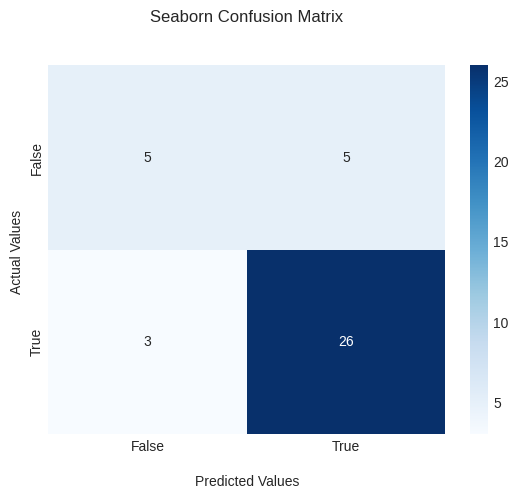

In [32]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

The above score of Logistic Regression on the above dataset is 0.79 which is 80% accurate. But this data has outliers present in it.

### Now we will remove outliers from the dataset and then test the accuracy.

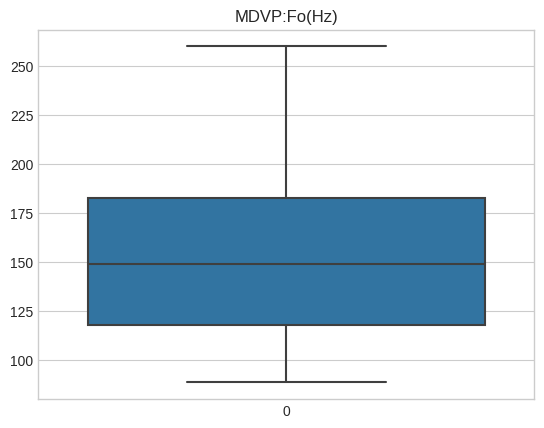

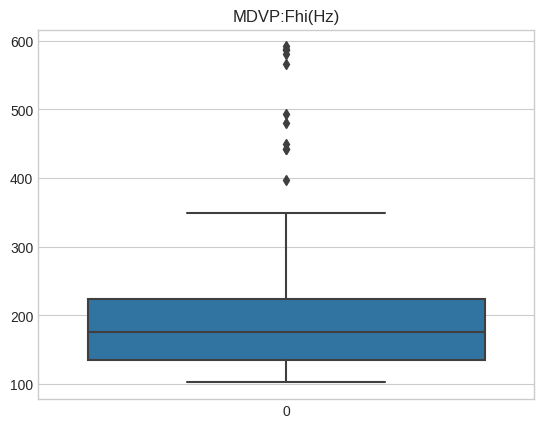

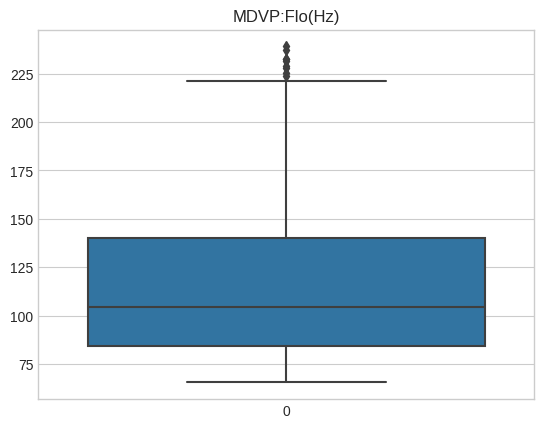

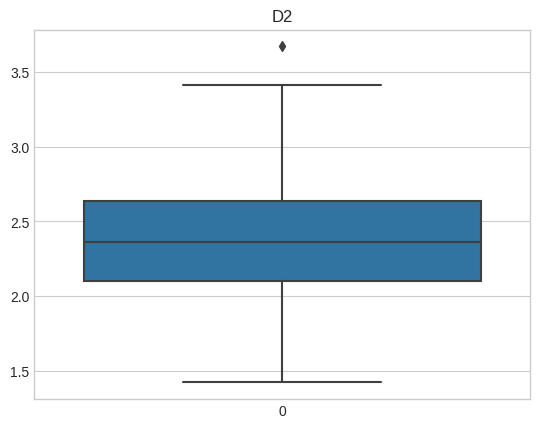

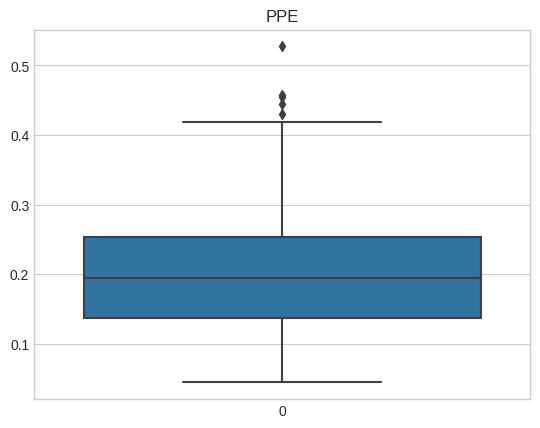

In [33]:
# First we make boxplot of the features we selected to predict the outliers and remove if any
featured_dataset = dummy_data_v2[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE']]
fields = featured_dataset.columns
for column in fields:
    sns.boxplot(data=featured_dataset[column])
    plt.title(column)
    plt.show()

In [34]:
"""
Normalizing the data in the Total day minutes and Customer service calls column 
beacuse the value is too high when compared to other independent variable
"""

from sklearn import preprocessing

# Create x to store scaled values as floats
df1 = dummy_data_v2.dropna()
x = df1[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE', 'status']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

df2 = pd.DataFrame(x_scaled)
# Run the normalizer on the dataframe
featured_dataset[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE', 'status']] = df2

<ipython-input-34-acf93c225311>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_dataset[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE', 'status']] = df2
<ipython-input-34-acf93c225311>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_dataset[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE', 'status']] = df2


In [35]:
featured_dataset

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)        D2       PPE  status
0       0.184308      0.112592      0.054815  0.390661  0.497310     1.0
1       0.198327      0.094930      0.278323  0.473145  0.671326     1.0
2       0.165039      0.059128      0.265288  0.408819  0.596682     1.0
3       0.165004      0.072927      0.264200  0.436977  0.671949     1.0
4       0.161150      0.080909      0.260107  0.404336  0.757611     1.0
..           ...           ...           ...       ...       ...     ...
190     0.499820      0.262986      0.165722  0.549049  0.183318     0.0
191     0.705488      0.307974      0.138243  0.605474  0.257558     0.0
192     0.502730      0.281413      0.050727  0.558967  0.180580     0.0
193     0.642893      0.601807      0.054279  0.318222  0.163137     0.0
194     0.733274      0.322794      0.071948  0.503673  0.215460     0.0

[195 rows x 6 columns]

<Axes: >

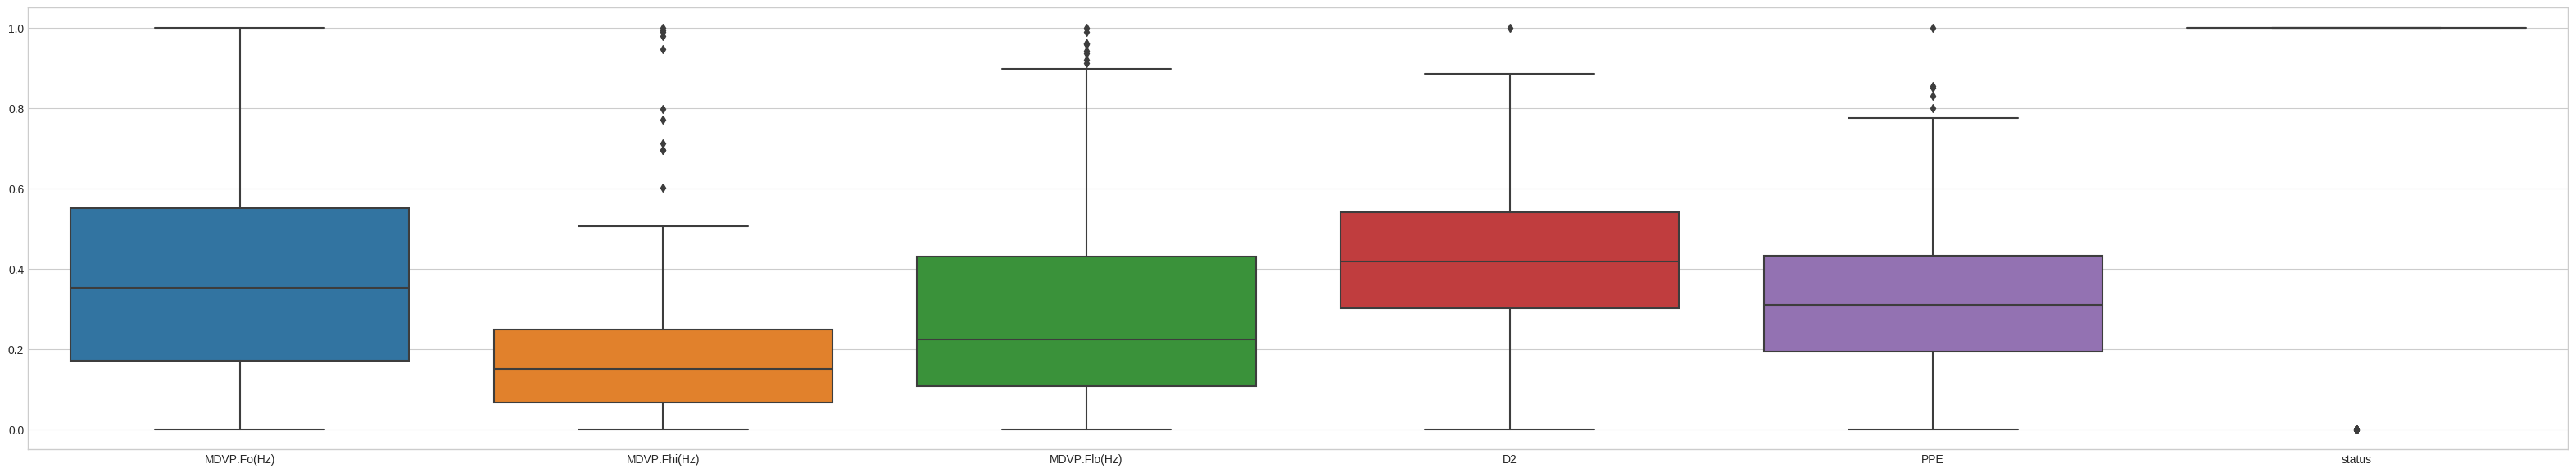

In [36]:
#Checking the Ranges of the columns after normalising dataset
plt.figure(figsize=(40,7))
sns.boxplot(data=featured_dataset)

In [37]:
# Now we detect the outliers and separate them
# We will be using Inter Quartile Range method to detect outliers

# First we calculate 25 and 75 percentile for all columns
fhi_25_perc = featured_dataset['MDVP:Fhi(Hz)'].quantile(0.25)
fhi_75_perc = featured_dataset['MDVP:Fhi(Hz)'].quantile(0.75)
fhi_iqr = fhi_75_perc - fhi_25_perc

flo_25_perc = featured_dataset['MDVP:Flo(Hz)'].quantile(0.25)
flo_75_perc = featured_dataset['MDVP:Flo(Hz)'].quantile(0.75)
flo_iqr = flo_75_perc - flo_25_perc

d2_25_perc = featured_dataset['D2'].quantile(0.25)
d2_75_perc = featured_dataset['D2'].quantile(0.75)
d2_iqr = d2_75_perc - d2_25_perc

ppe_25_perc = featured_dataset['PPE'].quantile(0.25)
ppe_75_perc = featured_dataset['PPE'].quantile(0.75)
ppe_iqr = ppe_75_perc - ppe_25_perc

# Now we find the upper and lower limit for both
fhi_limit_upper_perc = fhi_75_perc + 1.5 * fhi_iqr
fhi_limit_lower_perc = fhi_25_perc - 1.5 * fhi_iqr

flo_limit_upper_perc = flo_75_perc + 1.5 * flo_iqr
flo_limit_lower_perc = flo_25_perc - 1.5 * flo_iqr

d2_limit_upper_perc = d2_75_perc + 1.5 * d2_iqr
d2_limit_lower_perc = d2_25_perc - 1.5 * d2_iqr

ppe_limit_upper_perc = ppe_75_perc + 1.5 * ppe_iqr
ppe_limit_lower_perc = ppe_25_perc - 1.5 * ppe_iqr

# Finding outliers
new_dataset = featured_dataset[featured_dataset['MDVP:Fhi(Hz)'] < fhi_limit_upper_perc]
new_dataset = featured_dataset[featured_dataset['MDVP:Fhi(Hz)'] > fhi_limit_lower_perc]
new_dataset = featured_dataset[featured_dataset['MDVP:Flo(Hz)'] < flo_limit_upper_perc]
new_dataset = featured_dataset[featured_dataset['MDVP:Flo(Hz)'] > flo_limit_lower_perc]
new_dataset = featured_dataset[featured_dataset['D2'] < d2_limit_upper_perc]
new_dataset = featured_dataset[featured_dataset['D2'] > d2_limit_lower_perc]
new_dataset = featured_dataset[featured_dataset['PPE'] < ppe_limit_upper_perc]
new_dataset = featured_dataset[featured_dataset['PPE'] > ppe_limit_lower_perc]
new_dataset

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)        D2       PPE  status
0       0.184308      0.112592      0.054815  0.390661  0.497310     1.0
1       0.198327      0.094930      0.278323  0.473145  0.671326     1.0
2       0.165039      0.059128      0.265288  0.408819  0.596682     1.0
3       0.165004      0.072927      0.264200  0.436977  0.671949     1.0
4       0.161150      0.080909      0.260107  0.404336  0.757611     1.0
..           ...           ...           ...       ...       ...     ...
190     0.499820      0.262986      0.165722  0.549049  0.183318     0.0
191     0.705488      0.307974      0.138243  0.605474  0.257558     0.0
192     0.502730      0.281413      0.050727  0.558967  0.180580     0.0
193     0.642893      0.601807      0.054279  0.318222  0.163137     0.0
194     0.733274      0.322794      0.071948  0.503673  0.215460     0.0

[195 rows x 6 columns]

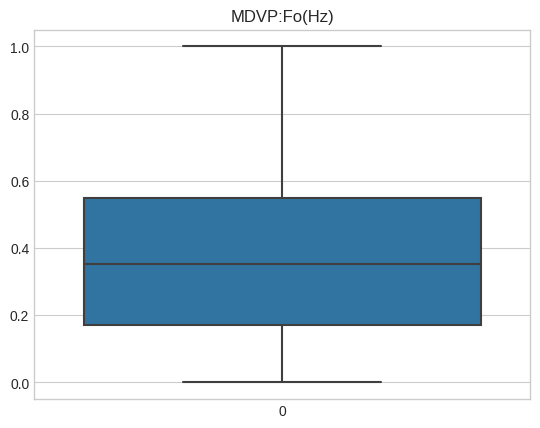

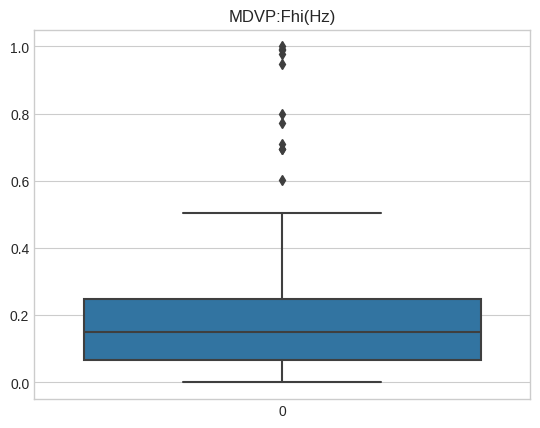

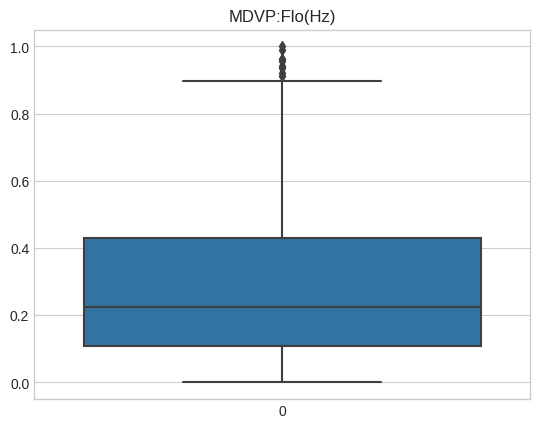

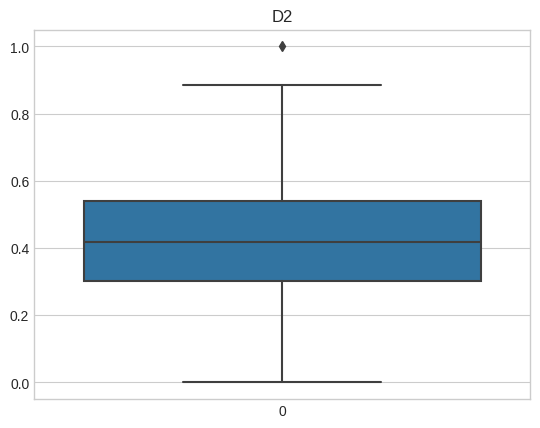

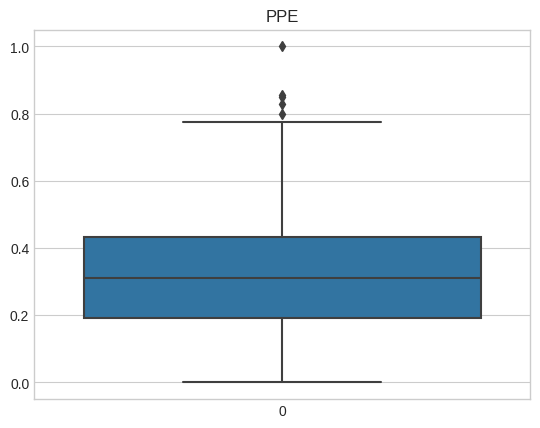

In [38]:
# Now we box plot the features with no outliers
featured_dataset_no_outliers = new_dataset[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE']]
fields_no_outliers = featured_dataset_no_outliers.columns
for column in fields_no_outliers:
    sns.boxplot(data=featured_dataset_no_outliers[column])
    plt.title(column)
    plt.show()

In [39]:
# Now we apply Logistic Regression on our new dataset without Outliers
logisticRegrNoOutliers = LogisticRegression()
X_no_outlier_data = new_dataset[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'D2', 'PPE']]
y_no_outlier_data = new_dataset[['status']]
X_train_no_outlier_data, X_test_no_outlier_data, y_train_no_outlier_data, y_test_no_outlier_data = train_test_split(X_no_outlier_data, y_no_outlier_data, test_size=0.2, random_state=42, stratify=y_no_outlier_data)
logisticRegrNoOutliers.fit(X_train_no_outlier_data, y_train_no_outlier_data)
threshold = 0.5
logisticRegrNoOutliers.predict(X_test_no_outlier_data)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0.])

In [40]:
s2= logisticRegrNoOutliers.predict(X_test_no_outlier_data)

In [41]:
# now we find Root Mean Square error for our new dataset with no outliers
rms = mean_squared_error(y_test_no_outlier_data, s2, squared=False)
rms

0.35805743701971643

In [42]:
# Now we find our score for new dataset with no outliers
logisticRegrNoOutliers.score(X_test_no_outlier_data, y_test_no_outlier_data)


0.8717948717948718

In [43]:
# Now we create confusion matrix for feature dataset with no outliers
from sklearn.metrics import confusion_matrix

cf_matrix_no_outliers = confusion_matrix(y_test_no_outlier_data, s2)
print(cf_matrix_no_outliers)


[[ 5  5]
 [ 0 29]]


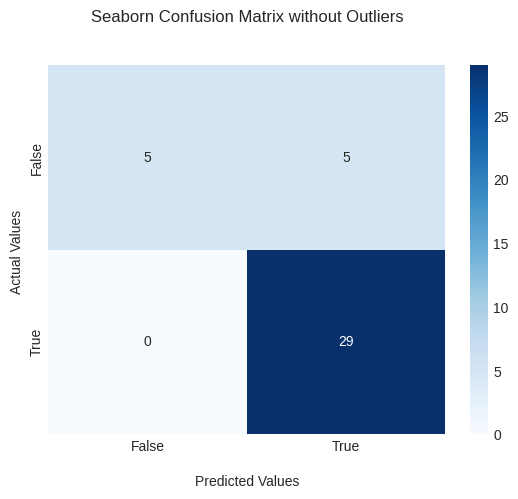

In [44]:
ax = sns.heatmap(cf_matrix_no_outliers, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix without Outliers\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Now we check check the % error on residuals for numeric data and check for bias and variance of the error by removing data and applying Imputation

In [45]:
dataset_a = data.copy()

# Selecting 1% of data from Total day minutes column
dataset_a_1_perc = dataset_a['MDVP:Fo(Hz)'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['MDVP:Fo(Hz)'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in Income row 
dataset_a['MDVP:Fo(Hz)'].isnull().sum()

<ipython-input-45-67343baa0d68>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_a['MDVP:Fo(Hz)'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN


2

In [46]:
# Now we will be using Mean Imputation method to replace Null values
dataset_a['MDVP:Fo(Hz)'] = dataset_a['MDVP:Fo(Hz)'].fillna(dataset_a['MDVP:Fo(Hz)'].mean())
dataset_a

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [47]:
#checking recovery after mean imputation in column 
dataset_a.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [48]:
# # Checking Bias and Variance for 1% imputed data by mean
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values.ravel(), X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values.ravel(), loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

Expected loss: 0.139
Bias: 0.128
Variance: 0.013


In [49]:
dataset_b = data.copy()

# Selecting 1% of data from Total day minutes column
dataset_b_1_perc = dataset_b['MDVP:Fo(Hz)'].sample(frac=0.05)
# Replacing selected column values by NaN
dataset_b['MDVP:Fo(Hz)'].loc[dataset_b.index.isin(dataset_b_1_perc.index)]=np.NaN

#Count of null values in Income row 
dataset_b['MDVP:Fo(Hz)'].isnull().sum()

<ipython-input-49-72bb9570c00f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_b['MDVP:Fo(Hz)'].loc[dataset_b.index.isin(dataset_b_1_perc.index)]=np.NaN


10

In [50]:
dataset_b['MDVP:Fo(Hz)'] = dataset_b['MDVP:Fo(Hz)'].fillna(dataset_b['MDVP:Fo(Hz)'].median())
dataset_b


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      149.689       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [51]:
# Checking Bias and Variance for 5% imputed data by median

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values.ravel(), X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values.ravel(), loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

Expected loss: 0.139
Bias: 0.128
Variance: 0.013


In [52]:
dataset_c = data.copy()

# Selecting 1% of data from Total day minutes column
dataset_c_1_perc = dataset_c['MDVP:Fo(Hz)'].sample(frac=0.10)
# Replacing selected column values by NaN
dataset_c['MDVP:Fo(Hz)'].loc[dataset_c.index.isin(dataset_c_1_perc.index)]=np.NaN

#Count of null values in Income row 
dataset_c['MDVP:Fo(Hz)'].isnull().sum()


<ipython-input-52-7c50e9d235db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_c['MDVP:Fo(Hz)'].loc[dataset_c.index.isin(dataset_c_1_perc.index)]=np.NaN


20

In [53]:
dataset_c['MDVP:Fo(Hz)'] = dataset_c['MDVP:Fo(Hz)'].fillna(dataset_c['MDVP:Fo(Hz)'].mode())
dataset_c

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6          NaN       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [54]:
# Checking Bias and Variance for 10% imputed data by mode

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values.ravel(), X_test_no_outlier_data.values, 
                                      y_test_no_outlier_data.values.ravel(), loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)


Expected loss: 0.139
Bias: 0.128
Variance: 0.013


In [55]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.3 MB/s eta 0:00:00


In [56]:
!pip install sklearn_pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
#importing the libraries 
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [58]:
data = pd.read_csv("Parkinsson disease.csv")
datac = pd.read_csv("Parkinsson disease.csv")

In [59]:
data.name = "data"
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  data      119.992       157.302        74.997         0.00784   
1  data      122.400       148.650       113.819         0.00968   
2  data      116.682       131.111       111.555         0.01050   
3  data      116.676       137.871       111.366         0.00997   
4  data      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [60]:
#Data types of the columns present in the DataSet
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [61]:
# To check duplicated values 
print(data.duplicated().value_counts())

False    195
dtype: int64


In [62]:
#changing our Main prediction (dependent) variable "Status" from Bool to Int type for detailed Statistical results
data['status'] = data['status'].astype('int64')

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


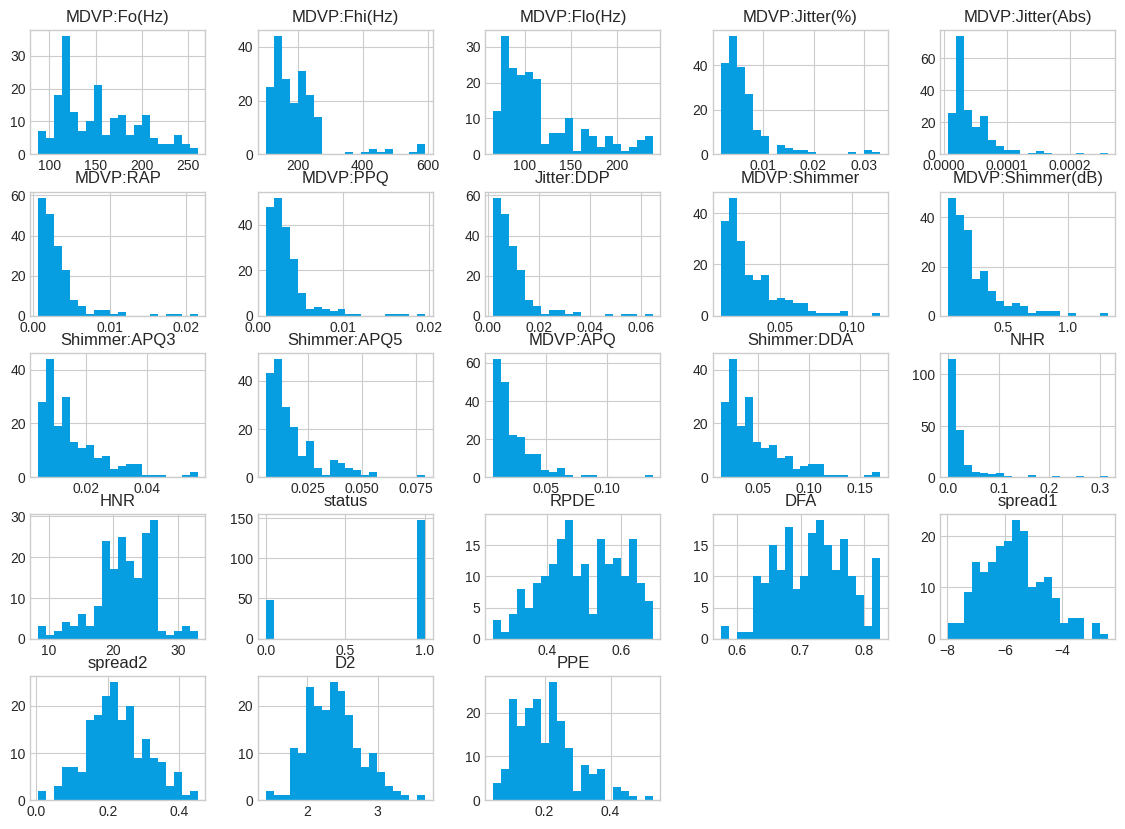

In [63]:
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

<Axes: >

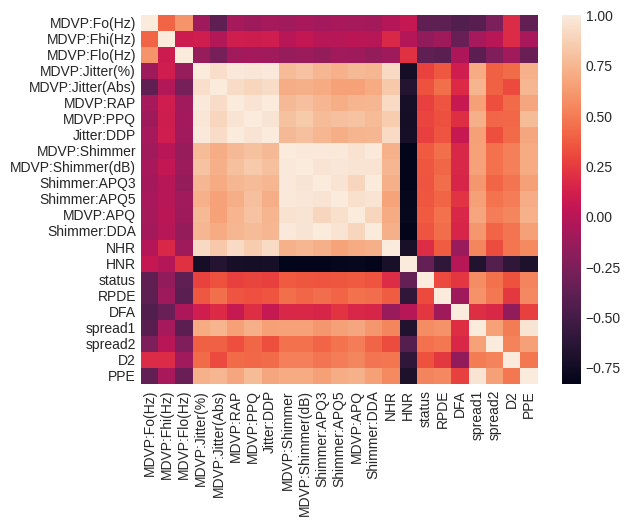

In [64]:
sns.heatmap(data.corr())

<Axes: xlabel='spread1', ylabel='status'>

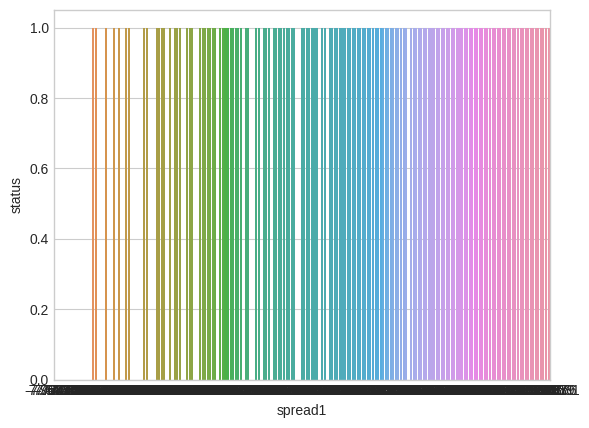

In [65]:
sns.barplot(x = data['spread1'], y = data['status'], data = data)

In [66]:
# We need to check missing values in dataset
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [68]:
drop_list = [
    'MDVP:Fo(Hz)',
    'spread2',
    'D2',
    'Shimmer:APQ3',
    'MDVP:Shimmer',
    'MDVP:Fhi(Hz)',
    'MDVP:Shimmer(dB)',
    'MDVP:APQ',
    'HNR',
    'MDVP:Jitter(Abs)',
    'MDVP:Flo(Hz)',
    'MDVP:Jitter(%)',
    'NHR',
    'Shimmer:APQ5',
    'Jitter:DDP',
    'MDVP:PPQ',
    'Shimmer:DDA',
    'RPDE',
    'DFA',
    'name'
]

data.drop(drop_list,axis=1,inplace=True)
datac.drop(drop_list,axis=1,inplace=True)

In [69]:
#Normalizing all the values present in the dataset.(Categorical values as well.)

data = pd.get_dummies(data)


from sklearn import preprocessing
import pandas as pd

#d = preprocessing.normalize(data)
#scaled_data = pd.DataFrame(d, columns=data.columns)
#scaled_data.head()

In [70]:
# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats

x = data[['MDVP:RAP','spread1', 'PPE', 'status']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['MDVP:RAP','spread1', 'PPE', 'status']] = pd.DataFrame(x_scaled)

In [71]:
data.head()

MDVP:RAP  status   spread1       PPE
0  0.145472     1.0  0.569875  0.497310
1  0.191233     1.0  0.703277  0.671326
2  0.229287     1.0  0.636745  0.596682
3  0.209056     1.0  0.695627  0.671949
4  0.282755     1.0  0.762472  0.757611

In [72]:
data2 = data.copy(deep=True)

In [73]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = data['status']
#x = data[['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
#'Area Locality'
drop_list2 = ['status']
data2.drop(drop_list2,axis=1,inplace=True)
x = data2.copy(deep=True)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False)

In [75]:
from sklearn.preprocessing import LabelEncoder
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [76]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
#Importing Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [77]:
#ss=StandardScaler()
#X_train=ss.fit_transform(X_train)
#X_test=ss.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_pred = lin_reg.predict(X_test)

print('Error', np.sqrt(mean_squared_error(Y_test, y_pred)))

Error 0.4912143472467757


In [78]:
print(lin_reg.score(X_test, Y_test))
print(r2_score(Y_test, y_pred))

-0.0194567351260464
-0.0194567351260464


<Axes: title={'center': "Model Coeff's"}>

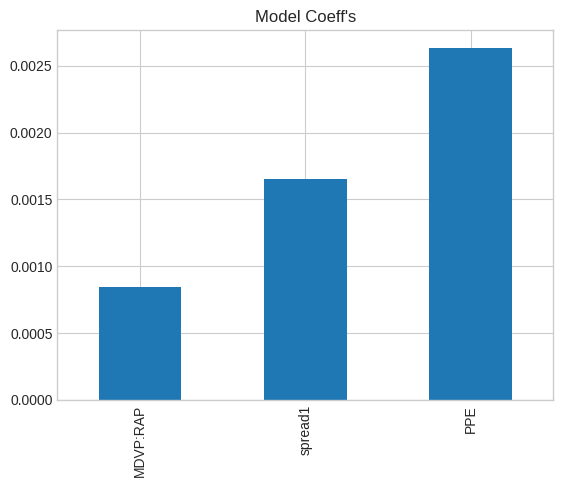

In [79]:
coef = pd.Series(lin_reg.coef_, x.columns).sort_values()
coef.plot(kind='bar', title =  'Model Coeff\'s')

In [80]:
reg = sm.OLS(Y_train, X_train).fit()

In [81]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 status   R-squared (uncentered):                   0.843
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              274.9
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                    2.20e-61
Time:                        02:45:05   Log-Likelihood:                         -63.661
No. Observations:                 156   AIC:                                      133.3
Df Residuals:                     153   BIC:                                      142.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MDVP:RAP       0.0033      0.001      2.799      0.006       0.001       0.006
spread1        0.0028      0.003      0.934      0.352      -0.003       0.009
PPE            0.0040      0.003      1.338      0.183      -0.002       0.010
==============================================================================
Omnibus:                       15.088   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.808
Skew:                           0.359   Prob(JB):                       0.0202
Kurtosis:                       2.171   Cond. No.                         20.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
import shap
shap.initjs()
model = LinearRegression()
model.fit(X_test, Y_test)

LinearRegression()

In [83]:
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


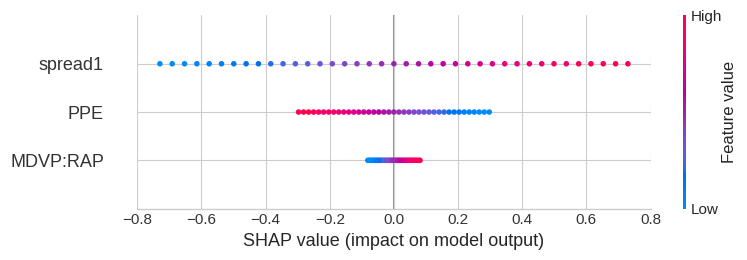

In [84]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_test)

In [85]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [86]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_train2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train2, y_train2)

train_mae = evaluate(X_train2, y_train2, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}")

train MAE = 0.026


In [87]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, shuffle=False)
catagorical_features = []
numerical_features = [c for c in X_test2.columns if c not in catagorical_features]
cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = RandomForestRegressor()

def evaluate(x, y, mapper=None, reg=None, transform=False):
    if transform:
        x = mapper.transform(x)
        x = sm.add_constant(x, has_constant='add') 
    y_pred2 = reg.predict(x)
    return mean_absolute_error(y, y_pred2)

pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_test2, y_test2)

test_mae = evaluate(X_test2, y_test2, reg=pipeline)
print(f"test MAE = {round(test_mae, 3)}")

test MAE = 0.117


<BarContainer object of 3 artists>

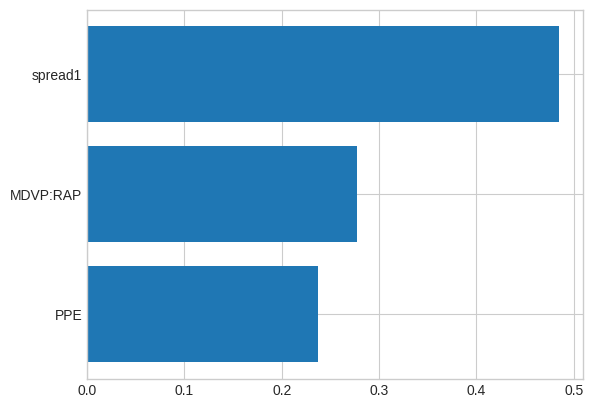

In [88]:
sorted_idx = reg.feature_importances_.argsort()
features = numerical_features + catagorical_features 
result = sorted(zip(features, reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

In [89]:
datac = pd.get_dummies(datac)

In [90]:
datac2 = datac.copy(deep=True)

In [91]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y2 = datac2['status']
#x = data[['BHK','Size','Floor','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact']]
#'Area Locality'
drop_list3 = ['status']
datac2.drop(drop_list2,axis=1,inplace=True)
x2 = datac2.copy(deep=True)

In [92]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, shuffle=False)
my_model = RandomForestClassifier(random_state=0).fit(X_train2, y_train2)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


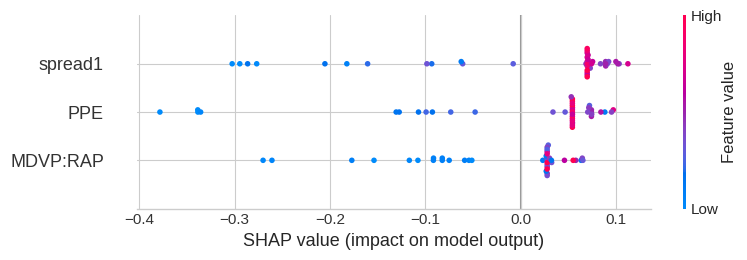

In [93]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test2)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test2)

In [94]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test2)

In [95]:
! pip install h2o
#Installing H20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=40e4b4e6dec6e37b1175a632a89481d077e14125f43e68bfb0e9fdde9829b72a
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [96]:
import h2o
from h2o.automl import H2OAutoML
import os

In [97]:
h2o.init(strict_version_check=False)
#taken from references
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9dee7hfb
  JVM stdout: /tmp/tmp9dee7hfb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9dee7hfb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_116wgf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

In [98]:
df = h2o.import_file("Parkinsson disease.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [99]:
drop_list_auto = [
    'MDVP:Fo(Hz)',
    'spread2',
    'D2',
    'Shimmer:APQ3',
    'MDVP:Shimmer',
    'MDVP:Fhi(Hz)',
    'MDVP:Shimmer(dB)',
    'MDVP:APQ',
    'HNR',
    'MDVP:Jitter(Abs)',
    'MDVP:Flo(Hz)',
    'MDVP:Jitter(%)',
    'NHR',
    'Shimmer:APQ5',
    'Jitter:DDP',
    'MDVP:PPQ',
    'Shimmer:DDA',
    'RPDE',
    'DFA',
    'name'
]

df.drop(drop_list_auto,axis=1)

MDVP:RAP    status    spread1       PPE
----------  --------  ---------  --------
   0.0037          1   -4.81303  0.284654
   0.00465         1   -4.07519  0.368674
   0.00544         1   -4.44318  0.332634
   0.00502         1   -4.1175   0.368975
   0.00655         1   -3.74779  0.410335
   0.00463         1   -4.24287  0.357775
   0.00155         1   -5.63432  0.211756
   0.00144         1   -6.1676   0.163755
   0.00293         1   -5.49868  0.231571
   0.00268         1   -5.01188  0.271362
[195 rows x 4 columns]

In [100]:
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [101]:
y3 = "status"
x3 = df.columns
x3.remove(y3)

In [102]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = [], verbosity="info", nfolds=0)

In [103]:
aml.train(x = x3, y = y3, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
02:51:55.572: Project: AutoML_1_20230410_25155
02:51:55.573: Cross-validation disabled by user: no fold column nor nfolds > 1.
02:51:55.574: Setting stopping tolerance adaptively based on the training frame: 0.05
02:51:55.574: Build control seed: 10
02:51:55.575: training frame: Frame key: AutoML_1_20230410_25155_training_py_3_sid_8971    cols: 24    rows: 135  chunks: 1    size: 12808  checksum: -4666699572588624366
02:51:55.575: validation frame: Frame key: py_5_sid_8971    cols: 24    rows: 30  chunks: 1    size: 4395  checksum: -1663769907021087754
02:51:55.576: leaderboard frame: Frame key: py_5_sid_8971    cols: 24    rows: 30  chunks: 1    size: 4395  checksum: -1663769907021087754
02:51:55.576: blending frame: NULL
02:51:55.576: response column: status
02:51:55.576: fold column: null
02:51:55.576: weights column: null
02:51:55.599: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]},

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_1_20230410_25155


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          10001                  4            8            6.05          7             10            8.73333

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.005619422181805375
RMSE: 0.0749628053224089
MAE: 0.04826919607887113
RMSLE: 0.05548747125579513
Mean Residual Deviance: 0.005619422181805375

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.03889525971981576
RMSE: 0.19721881177974823
MAE: 0.1269088057042855
RMSLE: 0.14007604362849893
Mean Residual Deviance: 0.03889525971981576

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-04-10 02:51:58  0.002 sec   0                  0.429757         0.369383        0.184691             0.357633           0.312593          0.127901
    2023-04-10 02:51:58  0.025 sec   5                  0.314705         0.264918        0.0990393            0.285265           0.230887          0.0813762
    2023-04-10 02:51:58  0.046 sec   10                 0.244105         0.197914        0.0595875            0.256659           0.191773          0.065874
    2023-04-10 02:51:58  0.078 sec   15                 0.199697         0.150703        0.0398789            0.235957           0.160342          0.0556756
    2023-04-10 02:51:58  0.109 sec   20                 0.170979         0.119055        0.0292337            0.224056           0.14102           0.0502011
    2023-04-10 02:51:58  0.129 sec   25                 0.153708         0.102311        0.0236261            0.222115           0.134562          0.049335
    2023-04-10 02:51:59  0.150 sec   30                 0.129253         0.0827143       0.0167063            0.215232           0.128252          0.0463246
    2023-04-10 02:51:59  0.179 sec   35                 0.114527         0.0718972       0.0131164            0.203396           0.122568          0.0413698
    2023-04-10 02:51:59  0.214 sec   40                 0.106047         0.0667954       0.0112459            0.198882           0.121021          0.0395542
    2023-04-10 02:51:59  0.245 sec   45                 0.0994105        0.0636237       0.00988244           0.20163            0.124913          0.0406545
    2023-04-10 02:51:59  0.265 sec   50                 0.0907063        0.0578335       0.00822764           0.198378           0.124483          0.0393539
    2023-04-10 02:51:59  0.284 sec   55                 0.0820883        0.0527289       0.00673848           0.197546           0.126906          0.0390243
    2023-04-10 02:51:59  0.306 sec   60                 0.0749628        0.0482692       0.00561942           0.197219           0.126909          0.0388953

Variable Importances: 
variable          relative_importance    scaled_importance     percentage
----------------  ---------------------  --------------------  ---------------------
MDVP:Fo(Hz)       31.59058380126953      1.0                   0.2603842130024754
PPE               16.166332244873047     0.5117452829163407    0.1332503927499005
spread1           15.384875297546387     0.4870082615227932    0.12680926290231623
spread2           11.816069602966309     0.3740377093788136    0.09739351458985099
MDVP:Fhi(Hz)      6.076788425445557      0.19236075102864508   0.050087

In [104]:
lb = aml.leaderboard

In [105]:
lb.head()

model_id                               rmse        mse       mae     rmsle    mean_residual_deviance
---------------------------------  --------  ---------  --------  --------  ------------------------
GBM_4_AutoML_1_20230410_25155      0.197219  0.0388953  0.126909  0.140076                 0.0388953
GBM_2_AutoML_1_20230410_25155      0.201942  0.0407808  0.118037  0.145919                 0.0407808
GBM_3_AutoML_1_20230410_25155      0.212175  0.0450182  0.122758  0.155635                 0.0450182
DRF_1_AutoML_1_20230410_25155      0.225653  0.0509191  0.132396  0.156615                 0.0509191
XGBoost_1_AutoML_1_20230410_25155  0.229936  0.0528706  0.141374  0.164058                 0.0528706
XRT_1_AutoML_1_20230410_25155      0.234607  0.0550404  0.146833  0.160838                 0.0550404
GBM_5_AutoML_1_20230410_25155      0.245376  0.0602095  0.119598  0.170144                 0.0602095
XGBoost_3_AutoML_1_20230410_25155  0.249096  0.0620489  0.155781  0.169189                 0.0620489
XGBoost_2_AutoML_1_20230410_25155  0.263815  0.0695984  0.155461  0.182458                 0.0695984
GLM_1_AutoML_1_20230410_25155      0.292725  0.0856878  0.246456  0.188974                 0.0856878
[10 rows x 6 columns]

In [106]:
df_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [107]:
df_pred.head()

predict
----------
 0.921487
 0.921719
 1.05576
 0.16313
 0.224357
 1.03742
-0.0118476
 0.656266
 0.44665
 0.357059
[10 rows x 1 column]

In [108]:
aml.leader.model_performance(df_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.06723450157720287
RMSE: 0.25929616575877645
MAE: 0.16515017879194188
RMSLE: 0.19732186096675097
Mean Residual Deviance: 0.06723450157720287

In [109]:
import shap
shap.initjs()

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                               rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo       predict
---------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  -------  ---------
XGBoost_3_AutoML_1_20230410_25155  0.21293   0.0453392  0.148682  0.161436                 0.0453392                 112                   0.083046  XGBoost   0.951199
GBM_4_AutoML_1_20230410_25155      0.259296  0.0672345  0.16515   0.197322                 0.0672345                 309                   0.267115  GBM       0.921487
GBM_2_AutoML_1_20230410_25155      0.269926  0.07286    0.174214  0.20297                  0.07286                   734                   0.100583  GBM       0.918292
GBM_3_AutoML_1_20230410_25155      0.270406  0.0731195  0.182527  0.207161                 0.0731195                 356                   0.036145  GBM       0.966278
DRF_1_AutoML_1_20230410_25155      0.277082  0.0767743  0.177894  0.207789                 0.0767743                 679                   0.023949  DRF       1
XRT_1_AutoML_1_20230410_25155      0.279564  0.078156   0.182083  0.207527                 0.078156                  579                   0.0268    DRF       1
XGBoost_2_AutoML_1_20230410_25155  0.286652  0.0821693  0.187023  0.212728                 0.0821693                 187                   0.262787  XGBoost   1.12596
XGBoost_1_AutoML_1_20230410_25155  0.319334  0.101974   0.221255  0.226605                 0.101974                  609                   0.02884   XGBoost   0.891293
GBM_5_AutoML_1_20230410_25155      0.321903  0.103621   0.178781  0.229699                 0.103621                  328                   0.026573  GBM       0.983306
GLM_1_AutoML_1_20230410_25155      0.342763  0.117486   0.275905  0.247792                 0.117486                  271                   0.108517  GLM       0.861719
[10 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

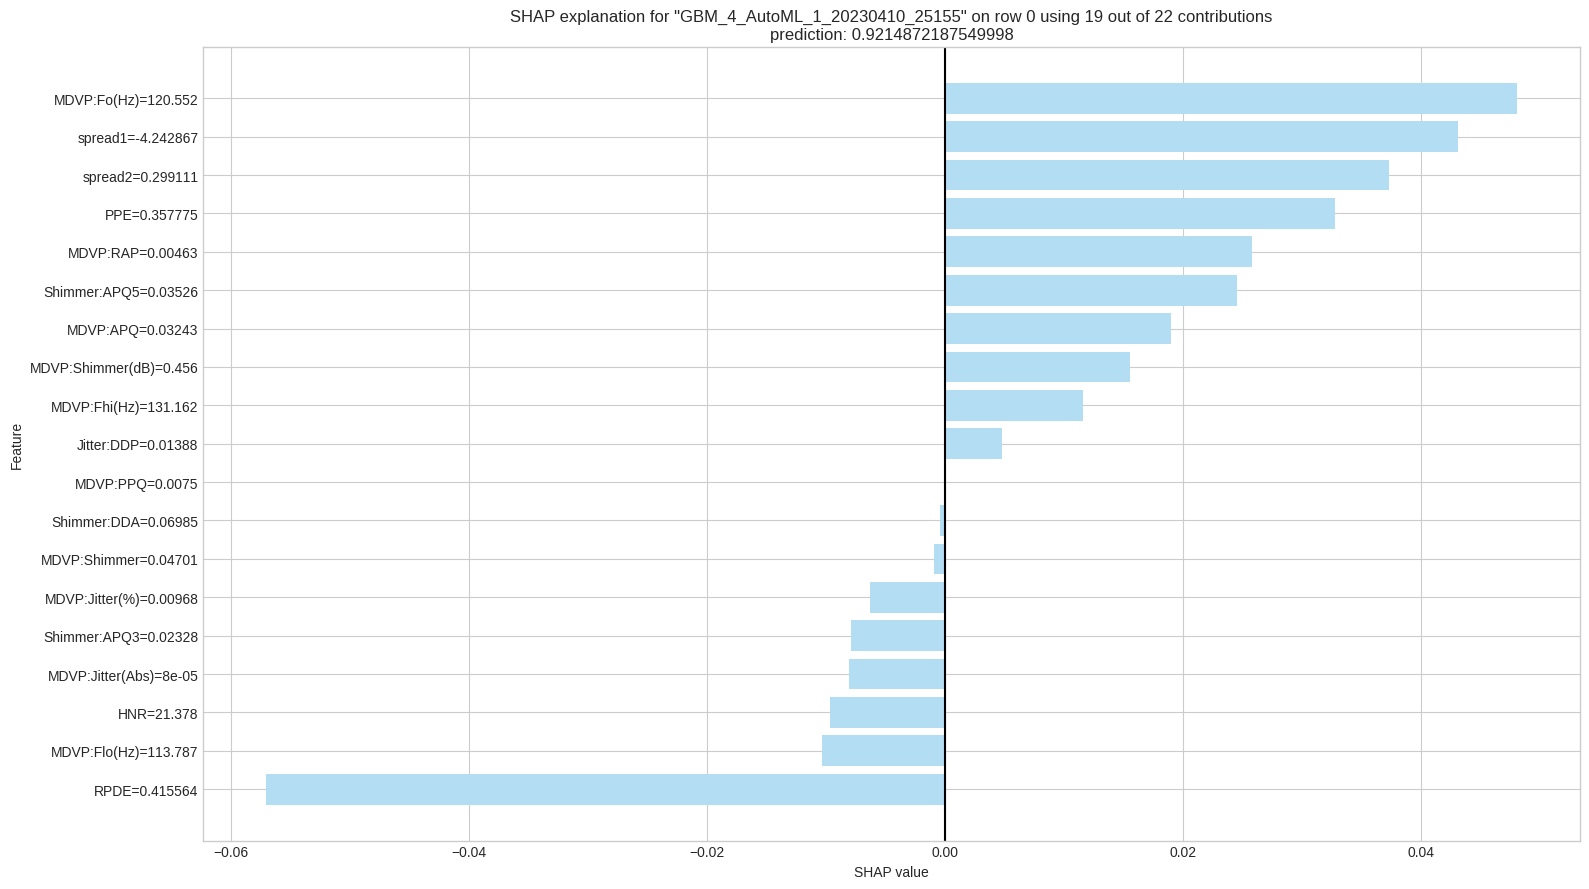

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                               rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo       predict
---------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  -------  ---------
XGBoost_3_AutoML_1_20230410_25155  0.21293   0.0453392  0.148682  0.161436                 0.0453392                 112                   0.083046  XGBoost   0.951199
GBM_4_AutoML_1_20230410_25155      0.259296  0.0672345  0.16515   0.197322                 0.0672345                 309                   0.267115  GBM       0.921487
GBM_2_AutoML_1_20230410_25155      0.269926  0.07286    0.174214  0.20297                  0.07286                   734                   0.100583  GBM       0.918292
GBM_3_AutoML_1_20230410_25155      0.270406  0.0731195  0.182527  0.207161                 0.0731195                 356                   0.036145  GBM       0.966278
DRF_1_AutoML_1_20230410_25155      0.277082  0.0767743  0.177894  0.207789                 0.0767743                 679                   0.023949  DRF       1
XRT_1_AutoML_1_20230410_25155      0.279564  0.078156   0.182083  0.207527                 0.078156                  579                   0.0268    DRF       1
XGBoost_2_AutoML_1_20230410_25155  0.286652  0.0821693  0.187023  0.212728                 0.0821693                 187                   0.262787  XGBoost   1.12596
XGBoost_1_AutoML_1_20230410_25155  0.319334  0.101974   0.221255  0.226605                 0.101974                  609                   0.02884   XGBoost   0.891293
GBM_5_AutoML_1_20230410_25155      0.321903  0.103621   0.178781  0.229699                 0.103621                  328                   0.026573  GBM       0.983306
GLM_1_AutoML_1_20230410_25155      0.342763  0.117486   0.275905  0.247792                 0.117486                  271                   0.108517  GLM       0.861719
[10 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [110]:
aml.explain_row(df_test, row_index=0)

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

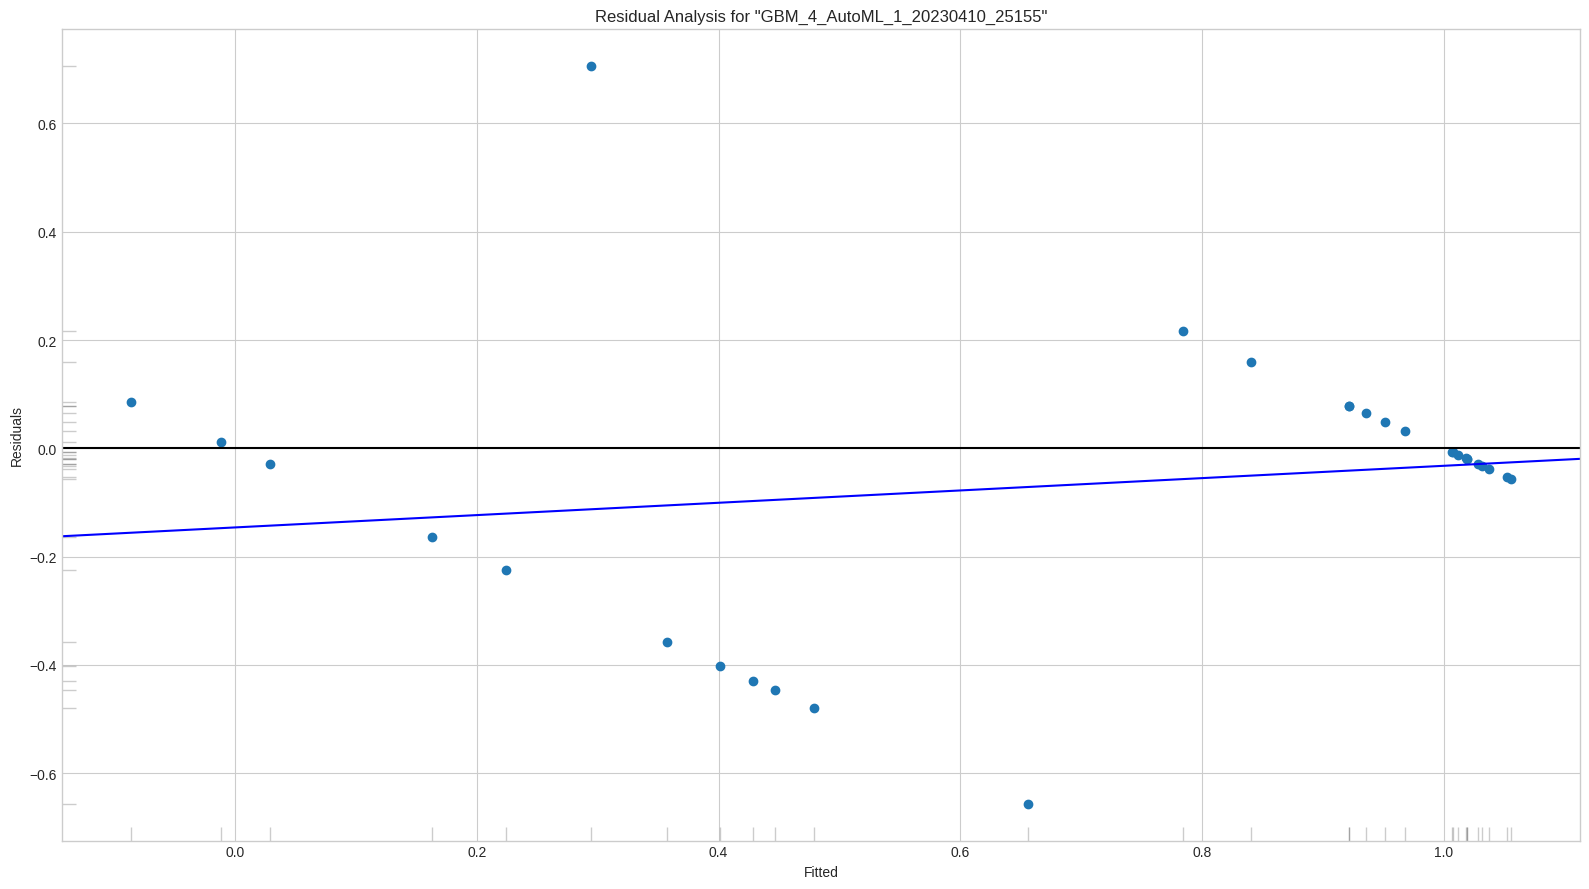

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

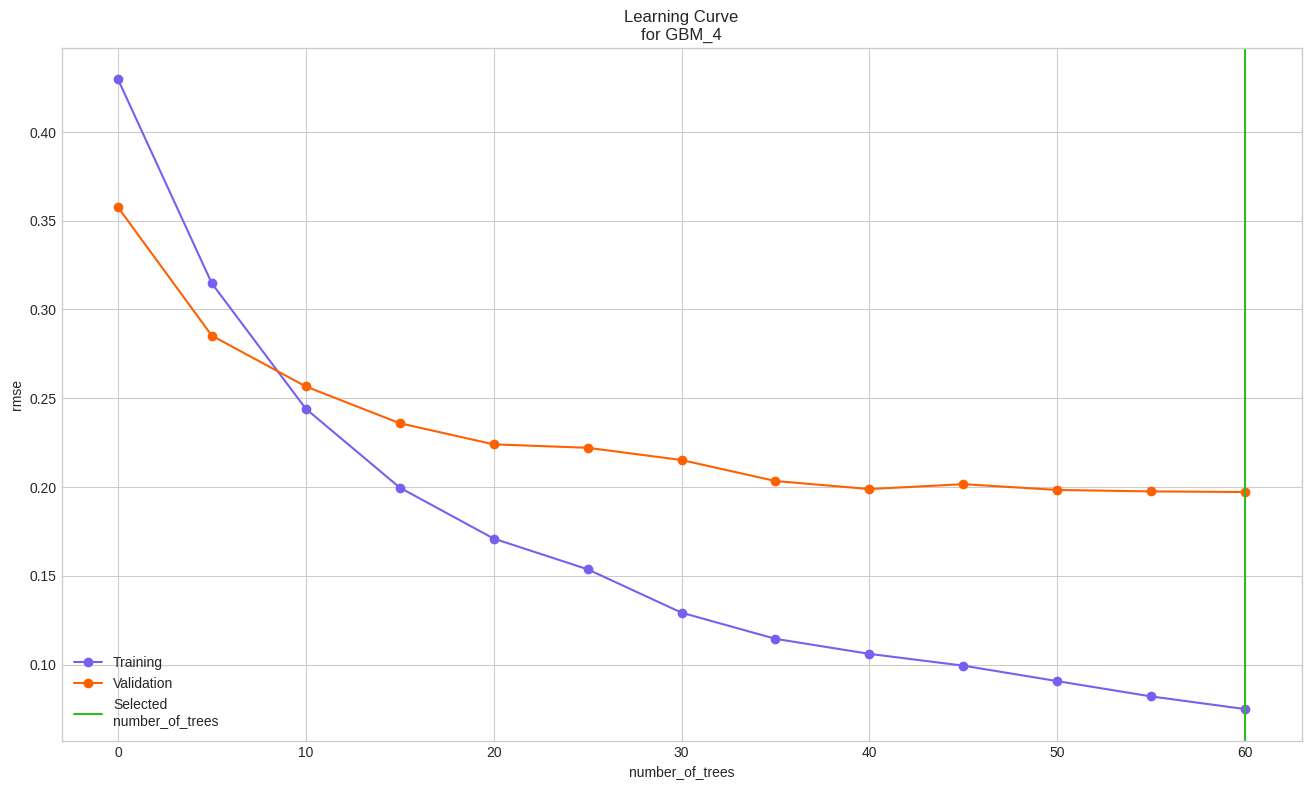

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

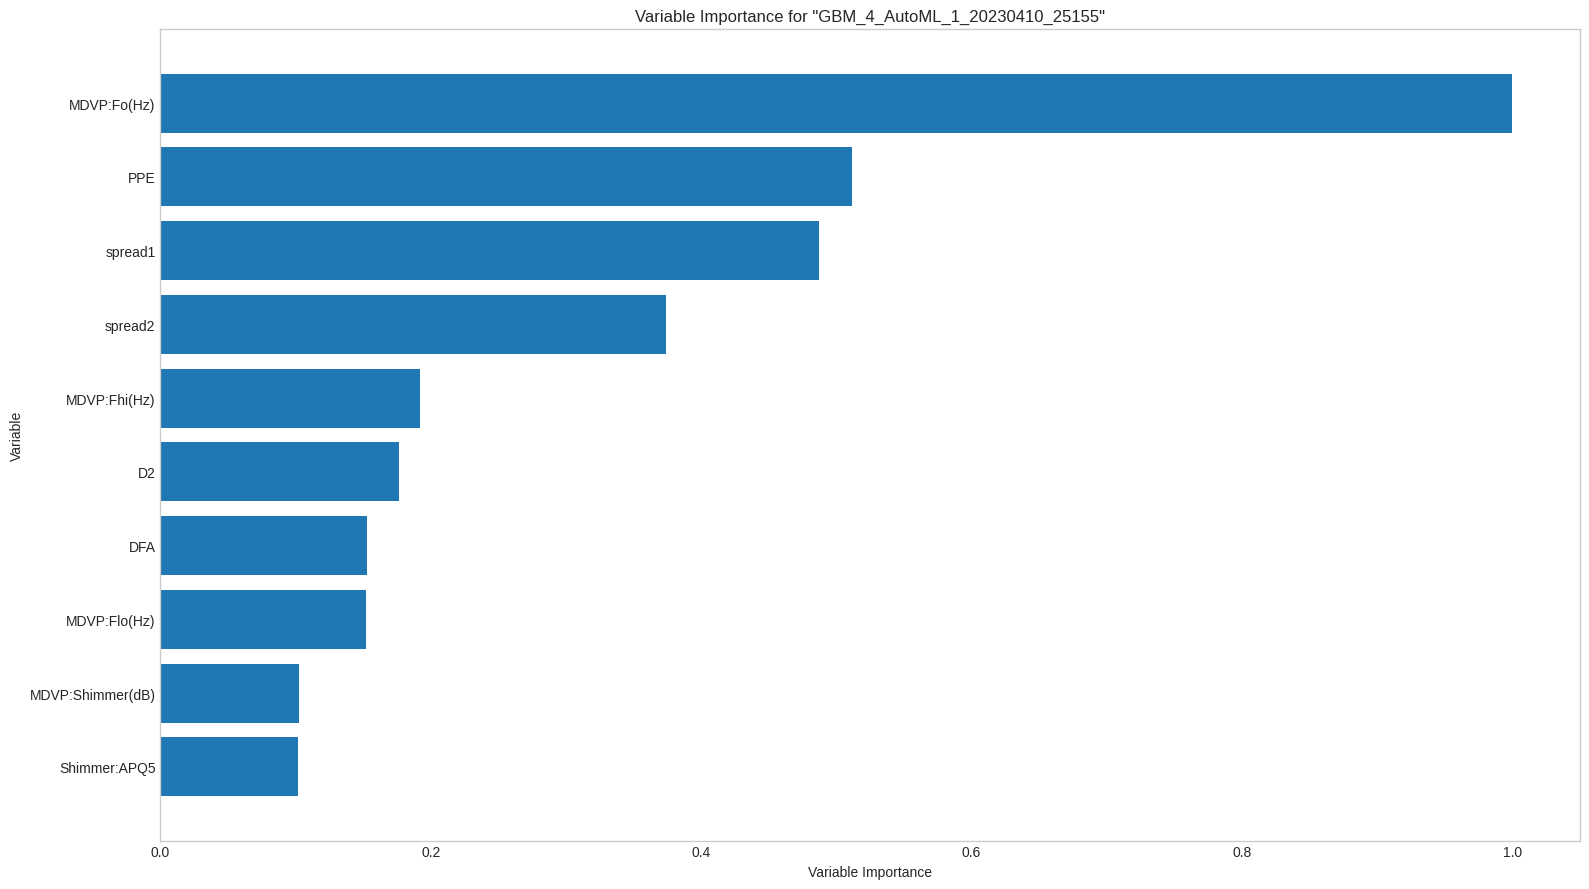

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

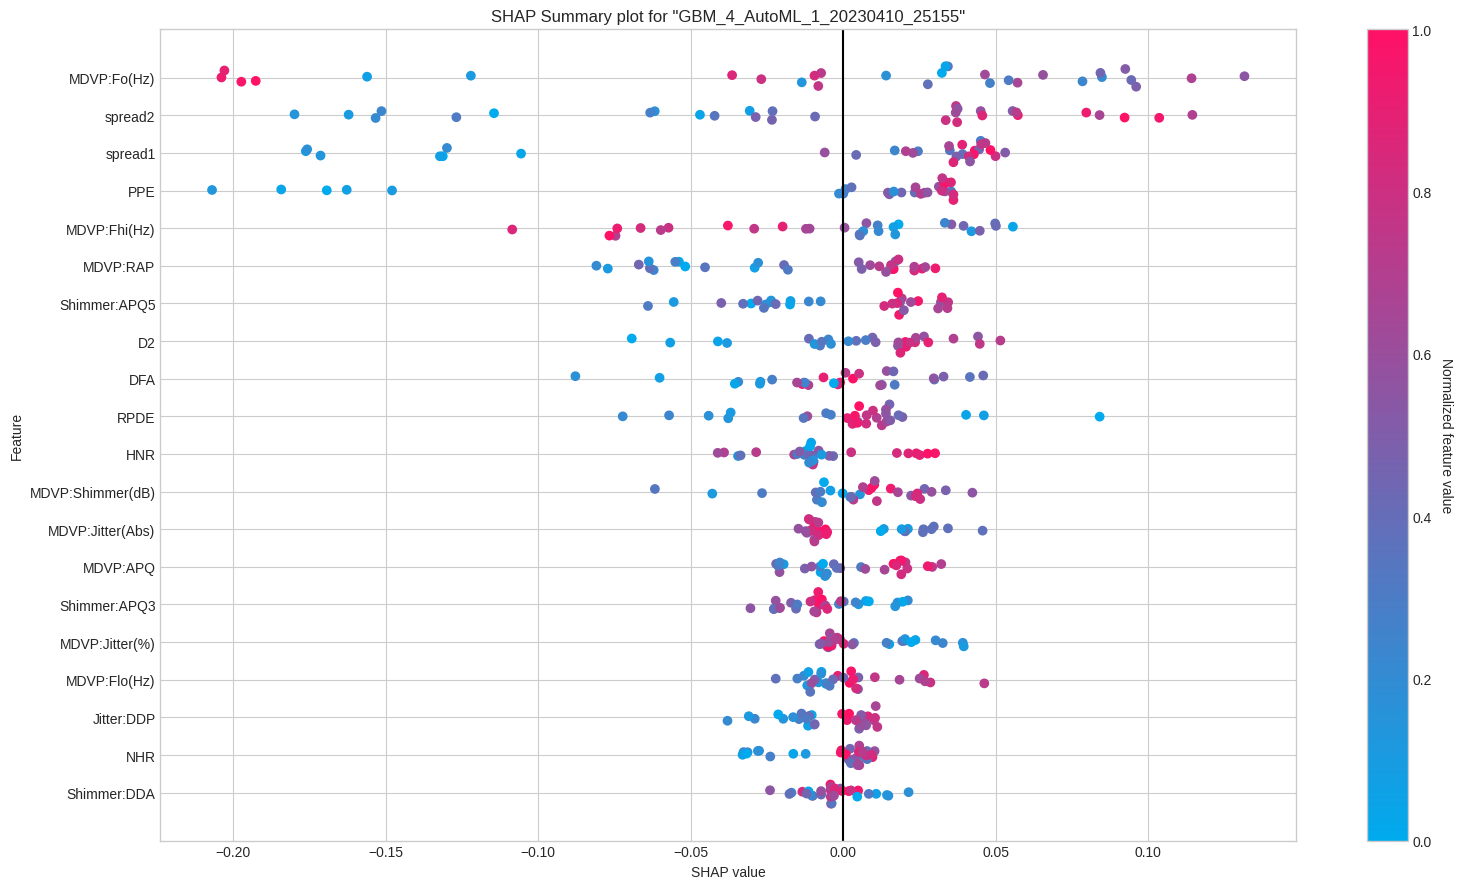

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

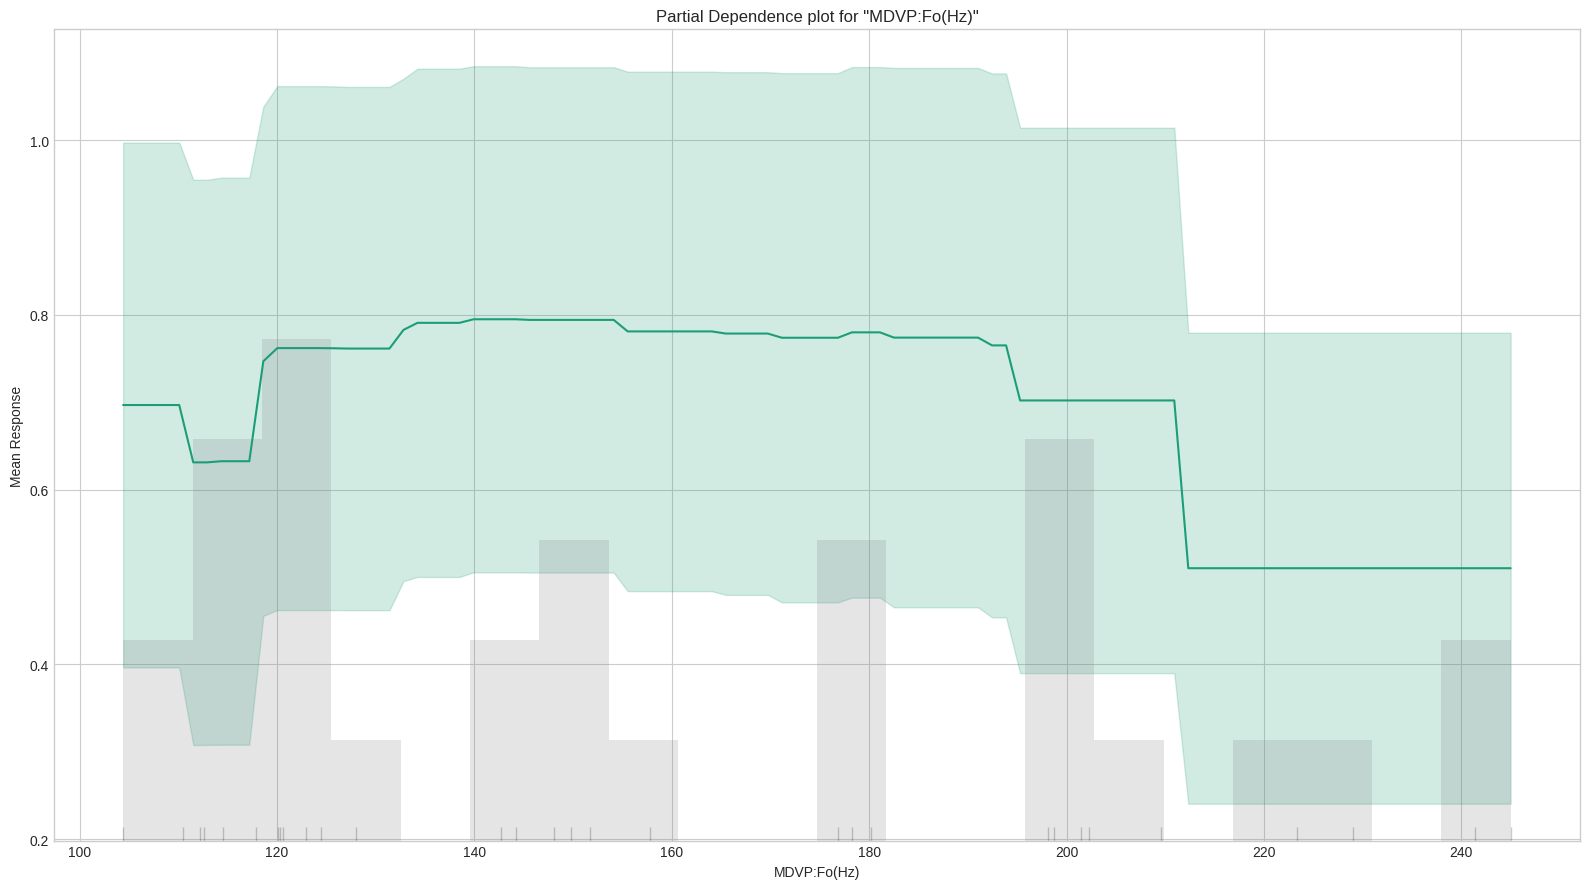

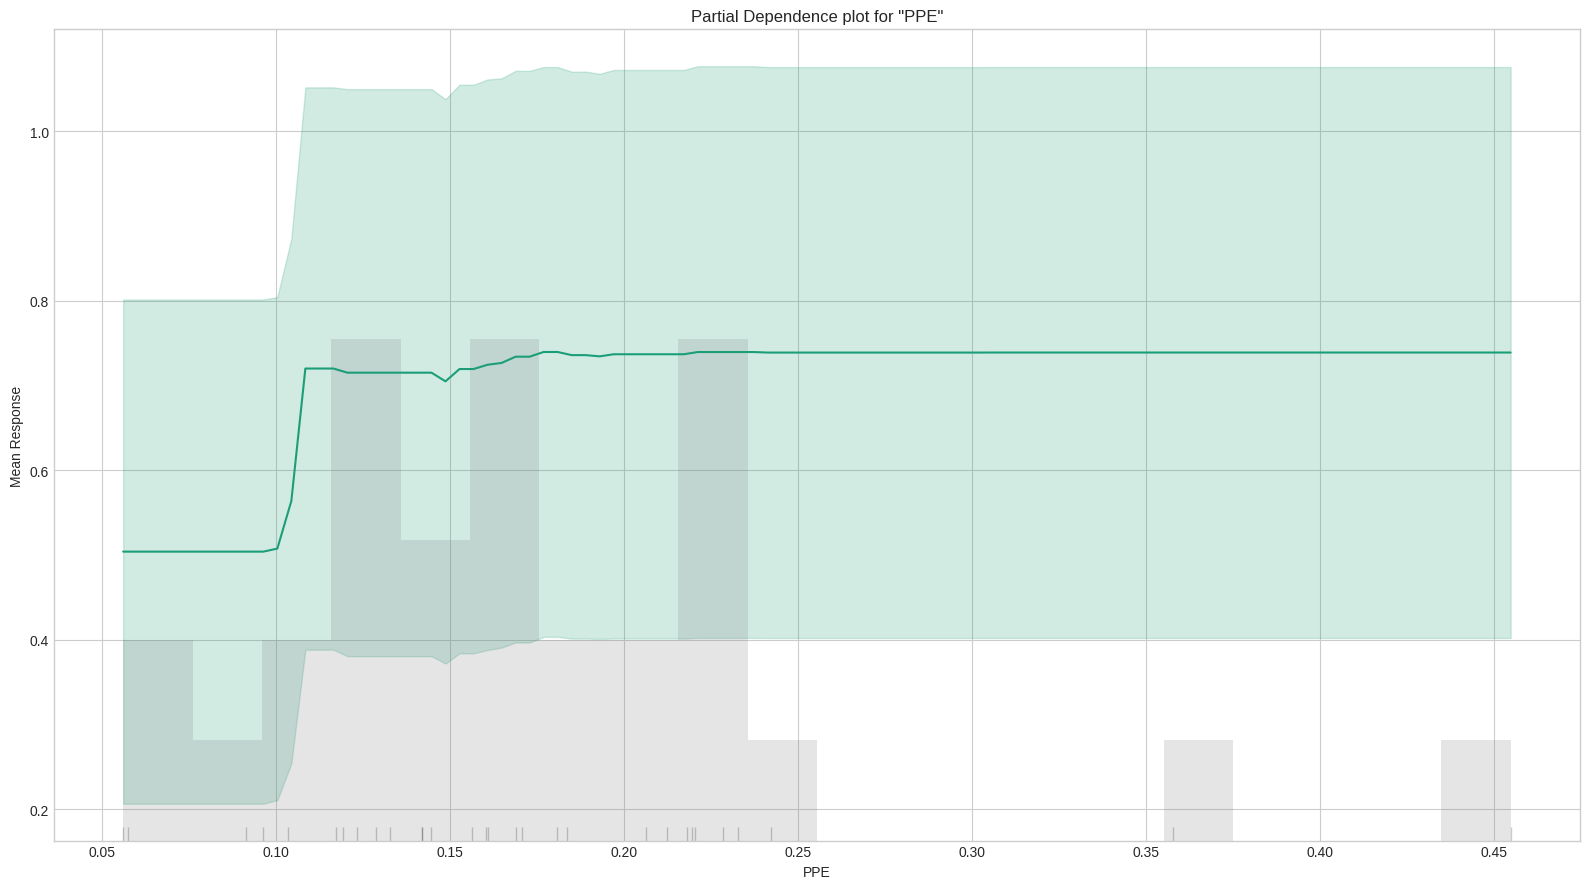

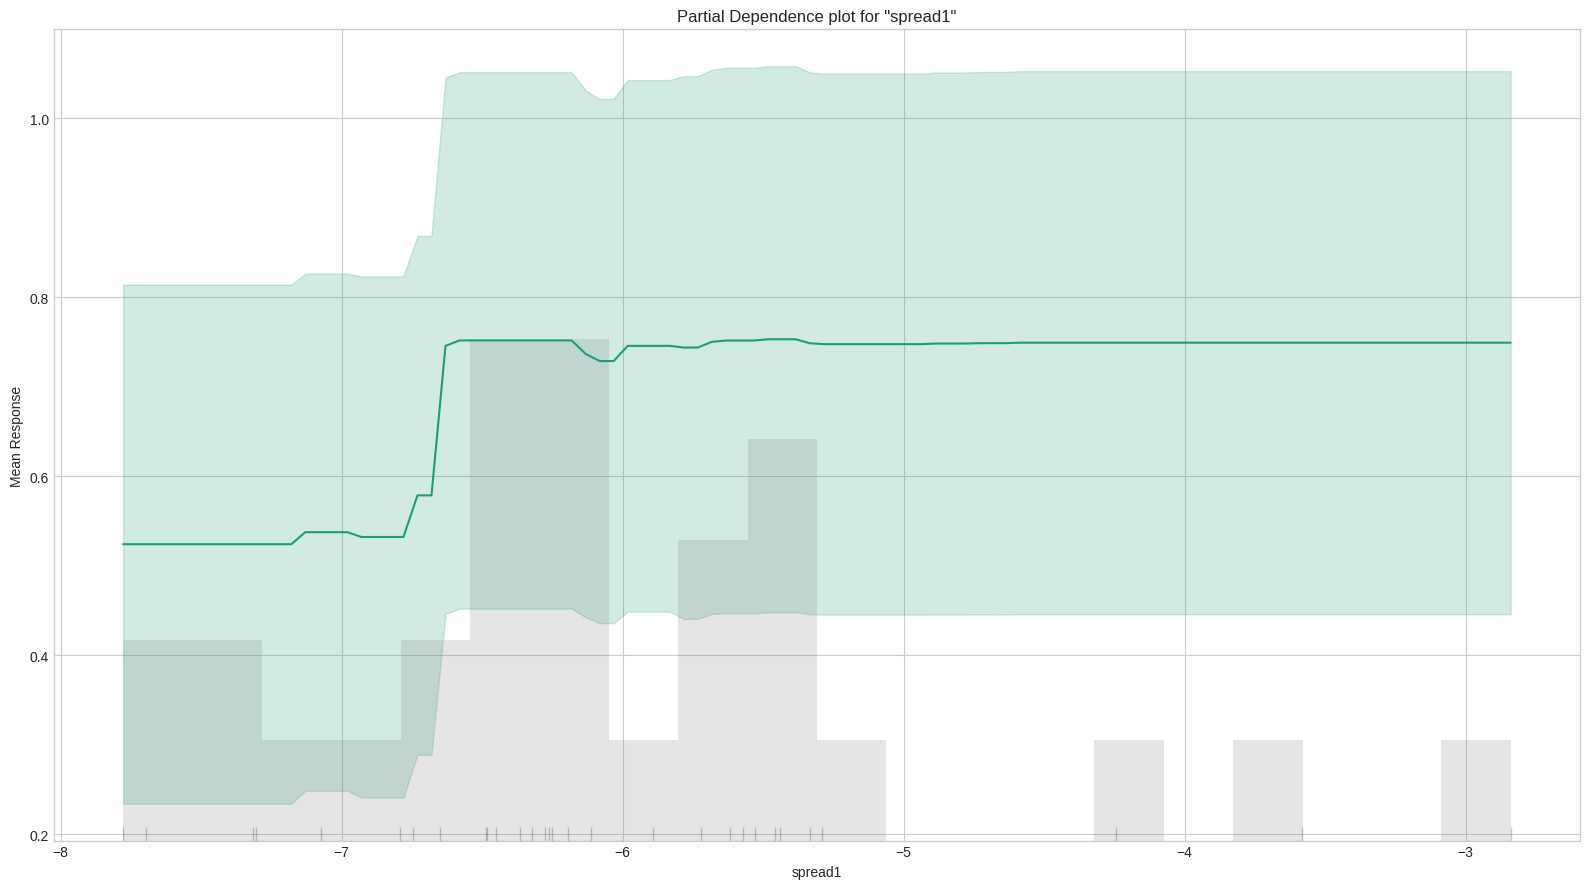

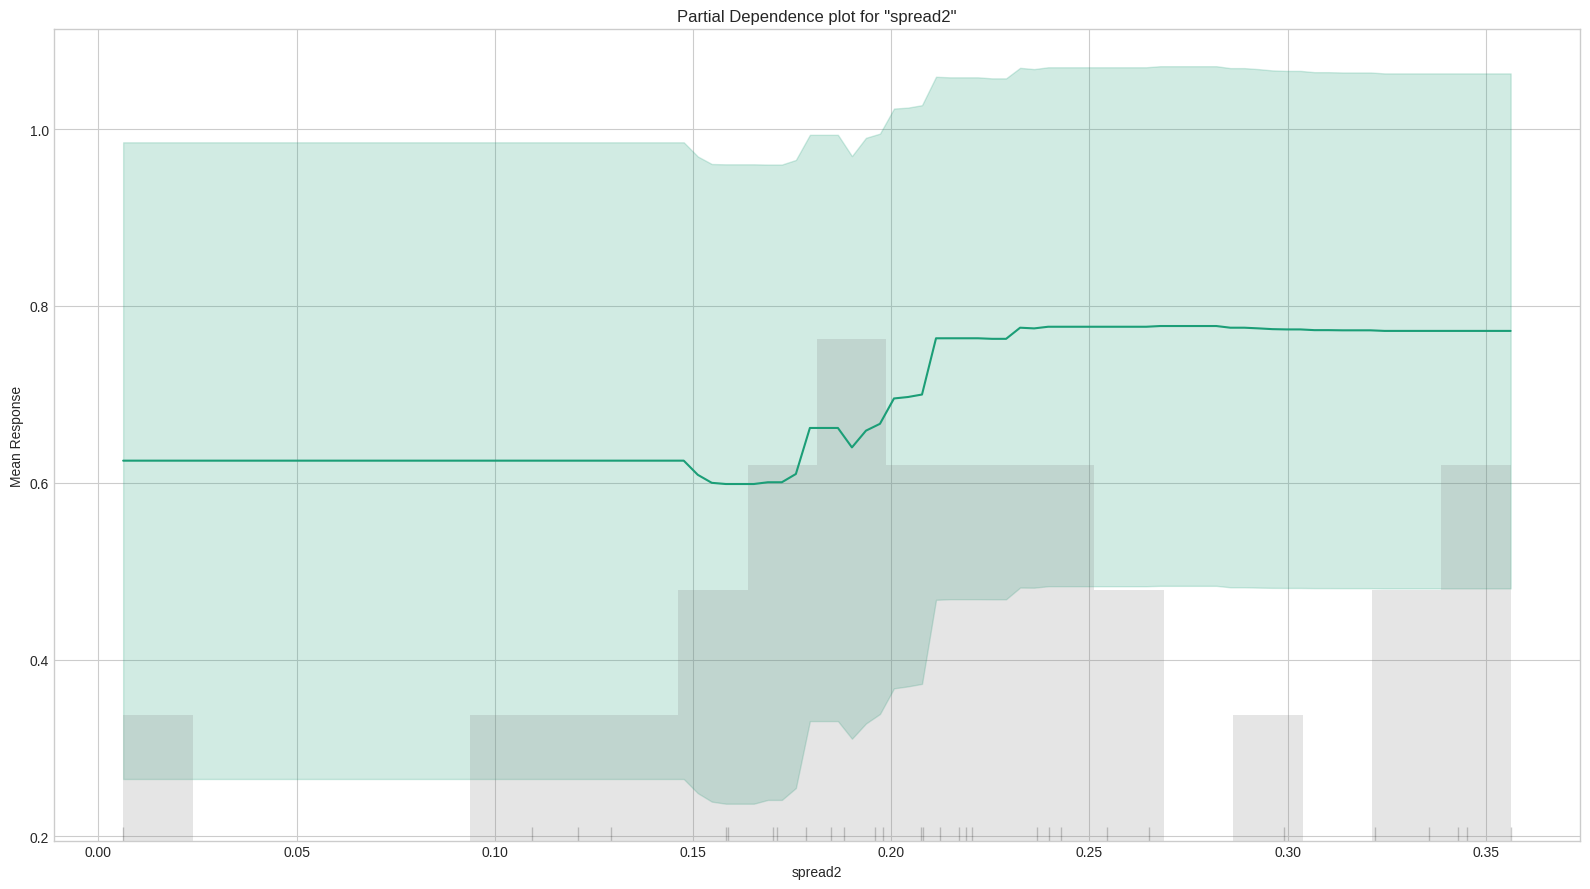

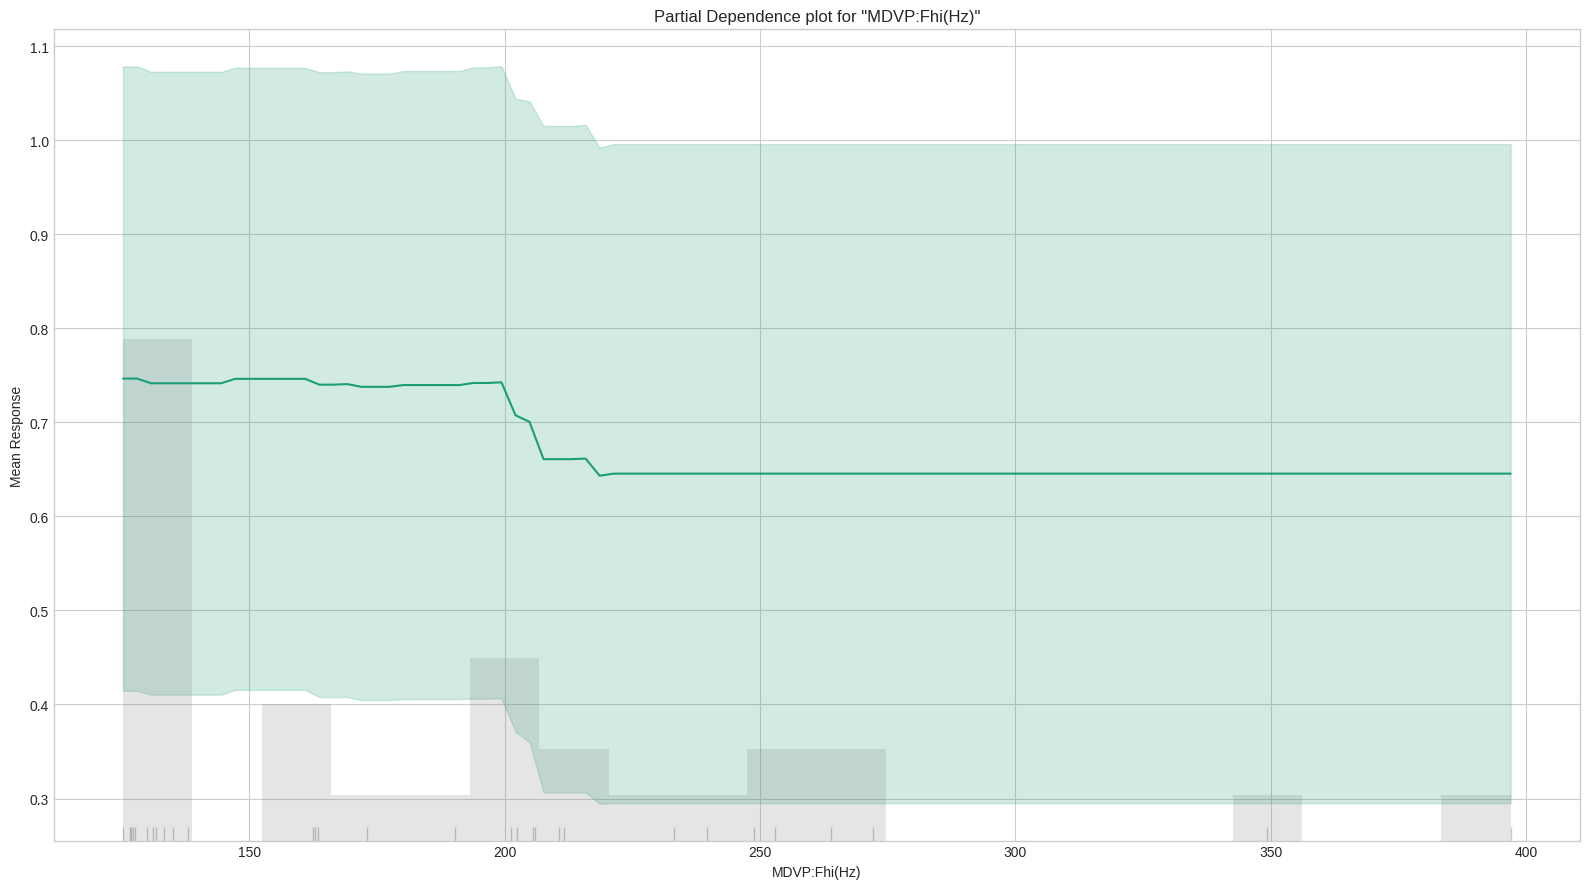

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

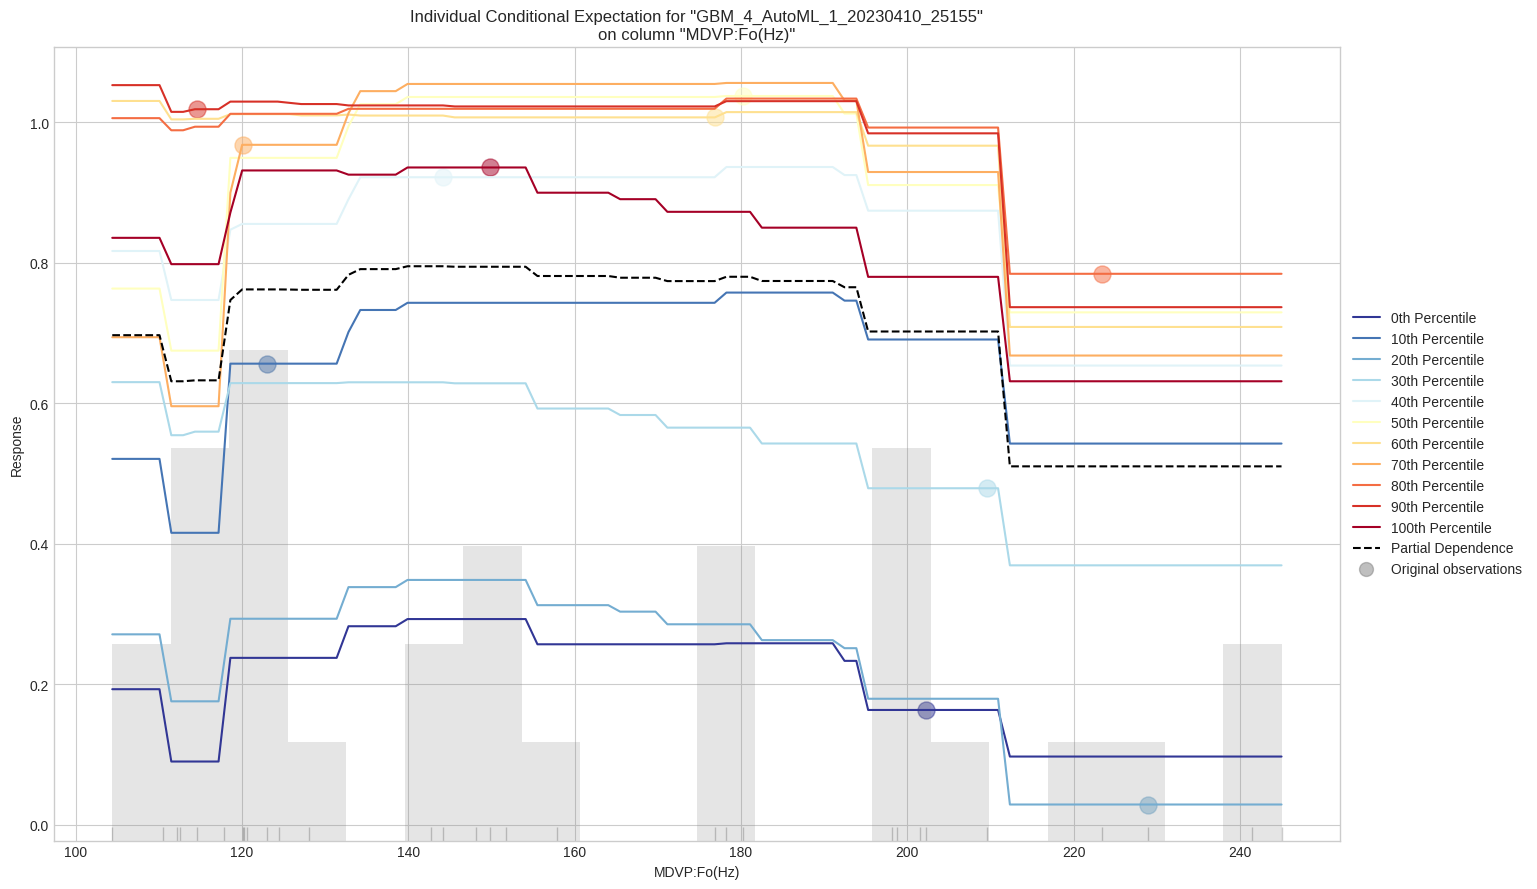

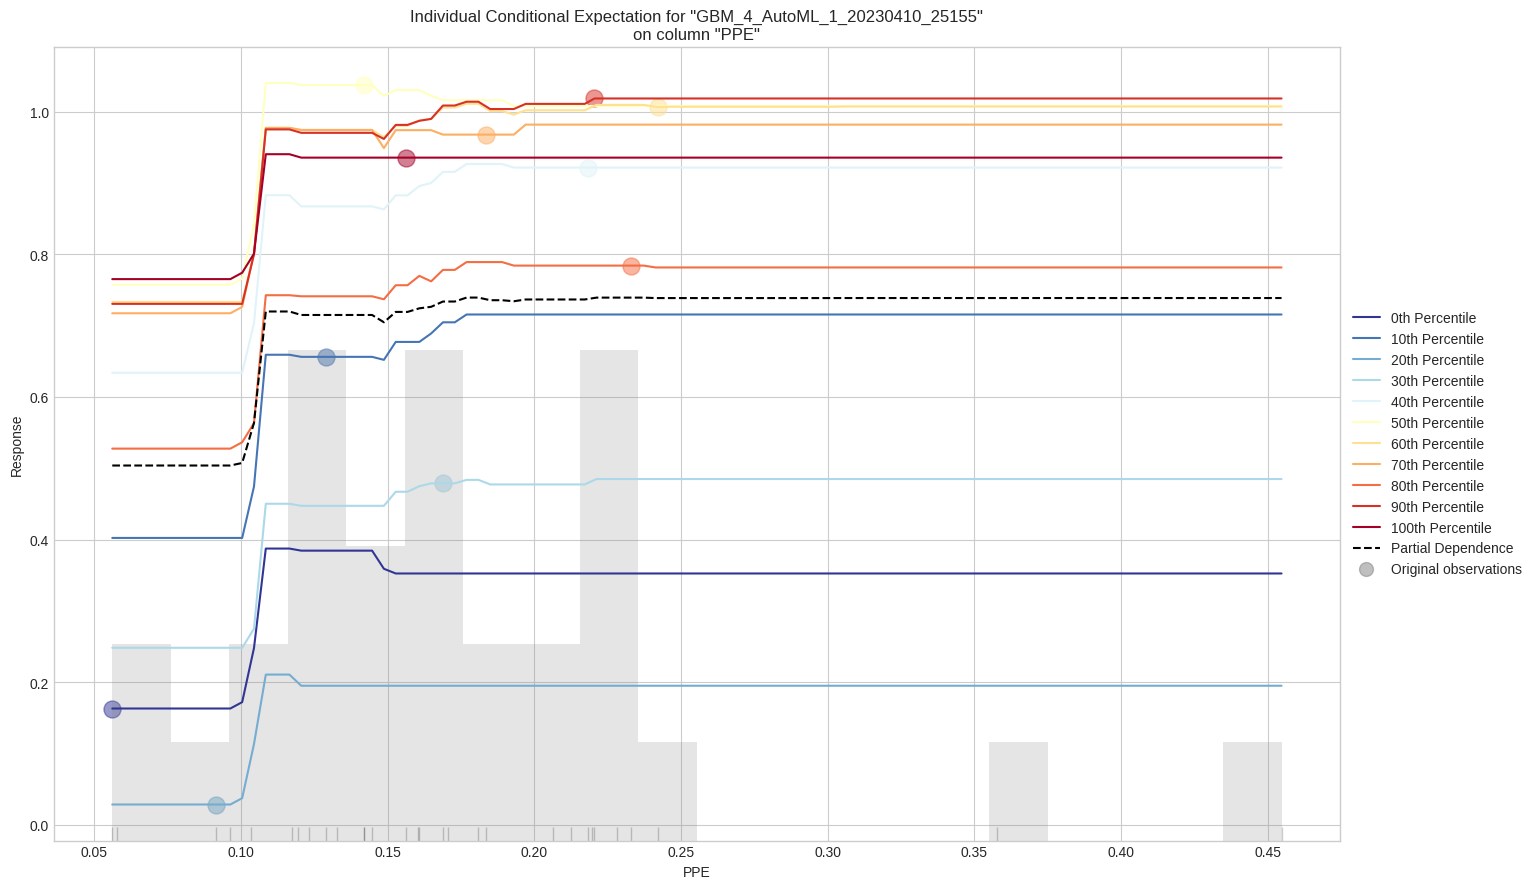

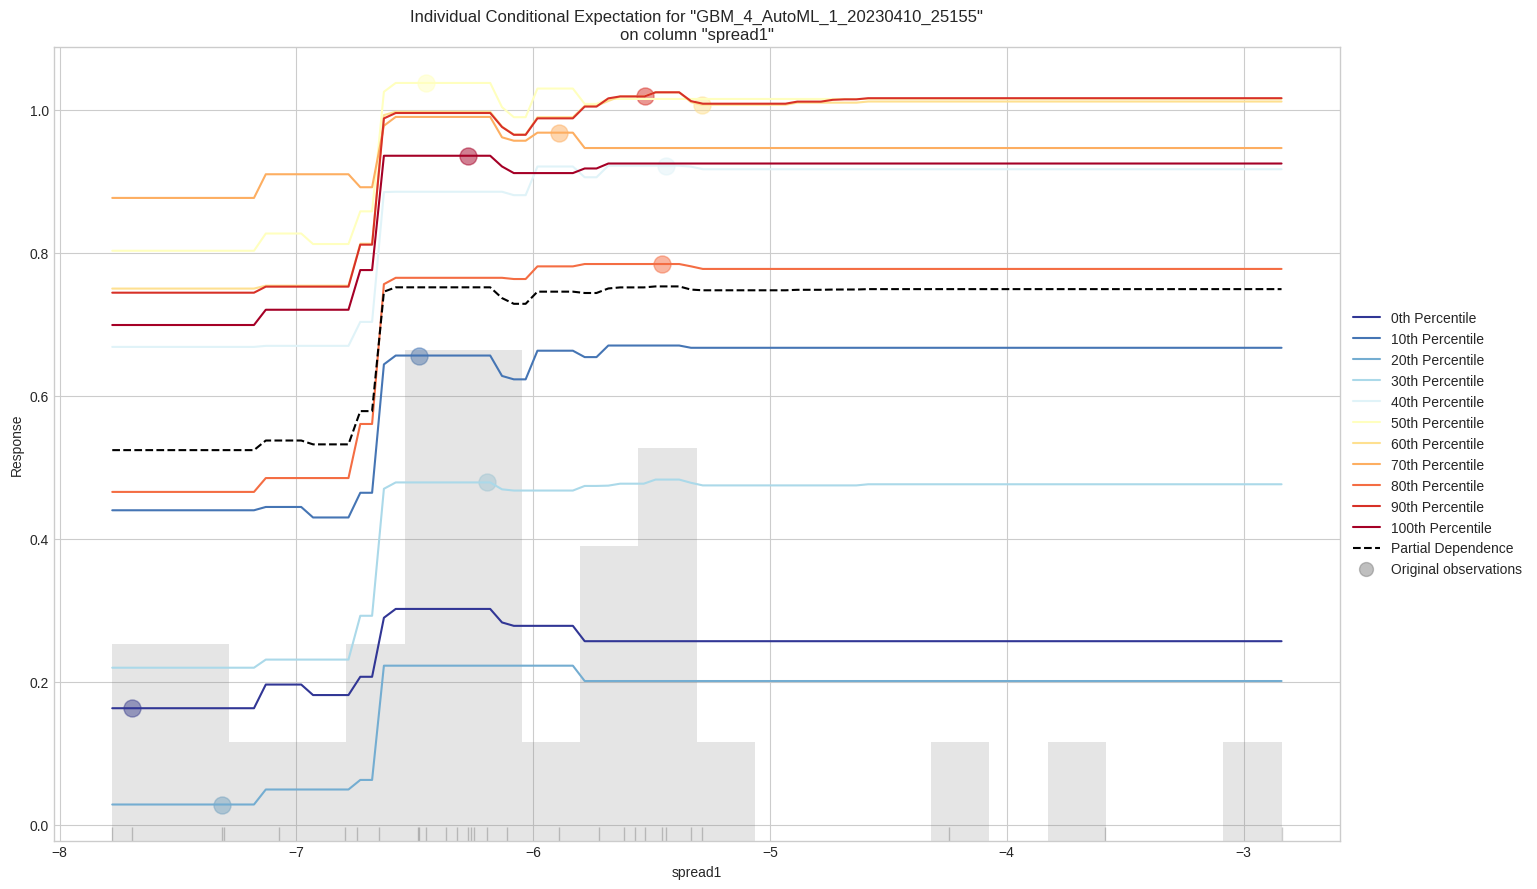

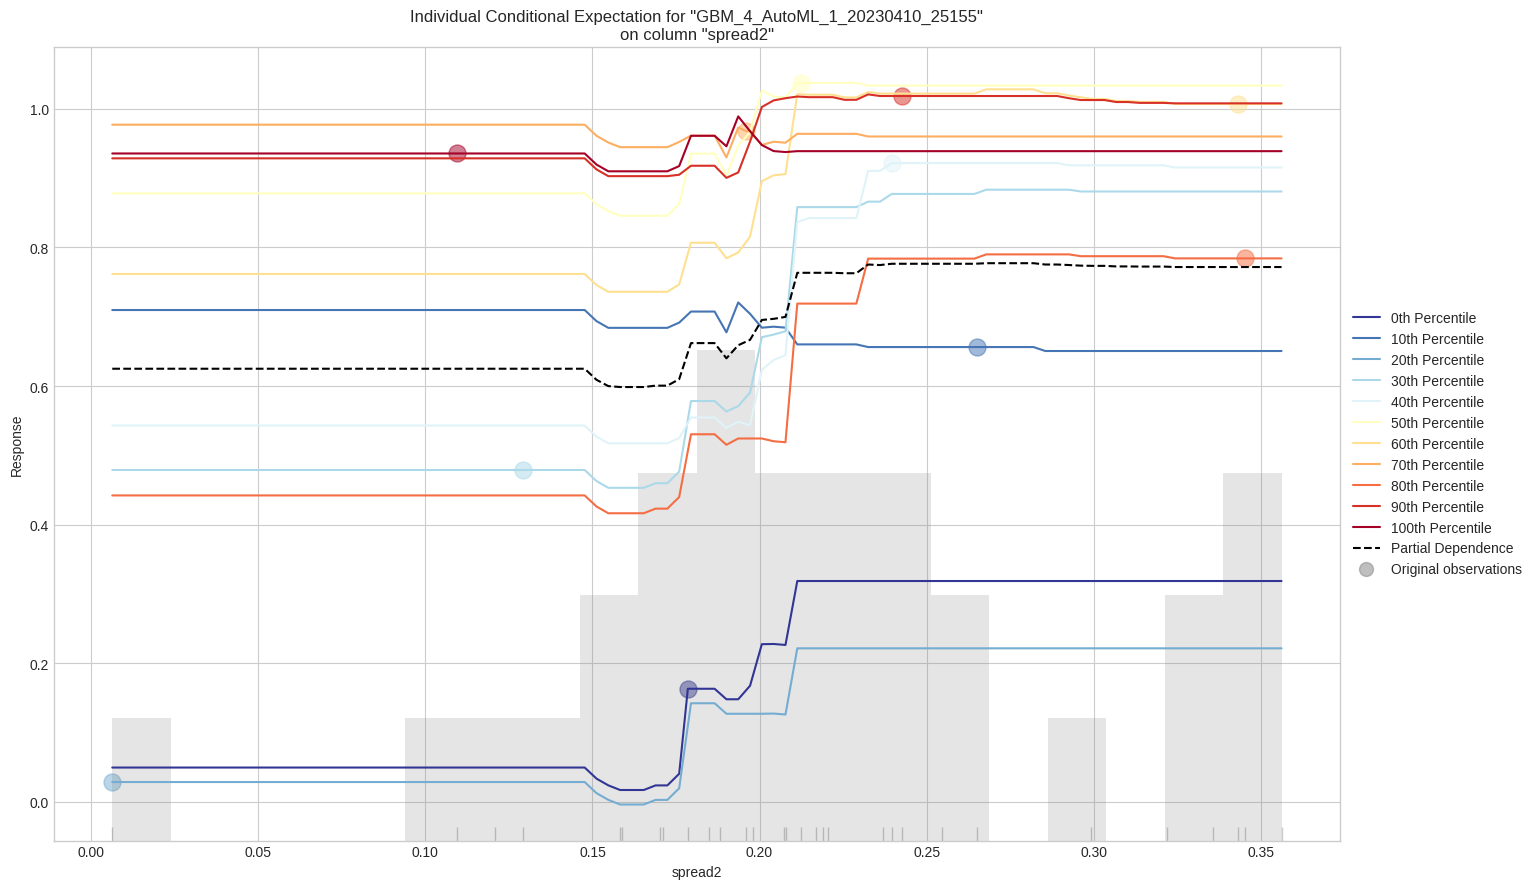

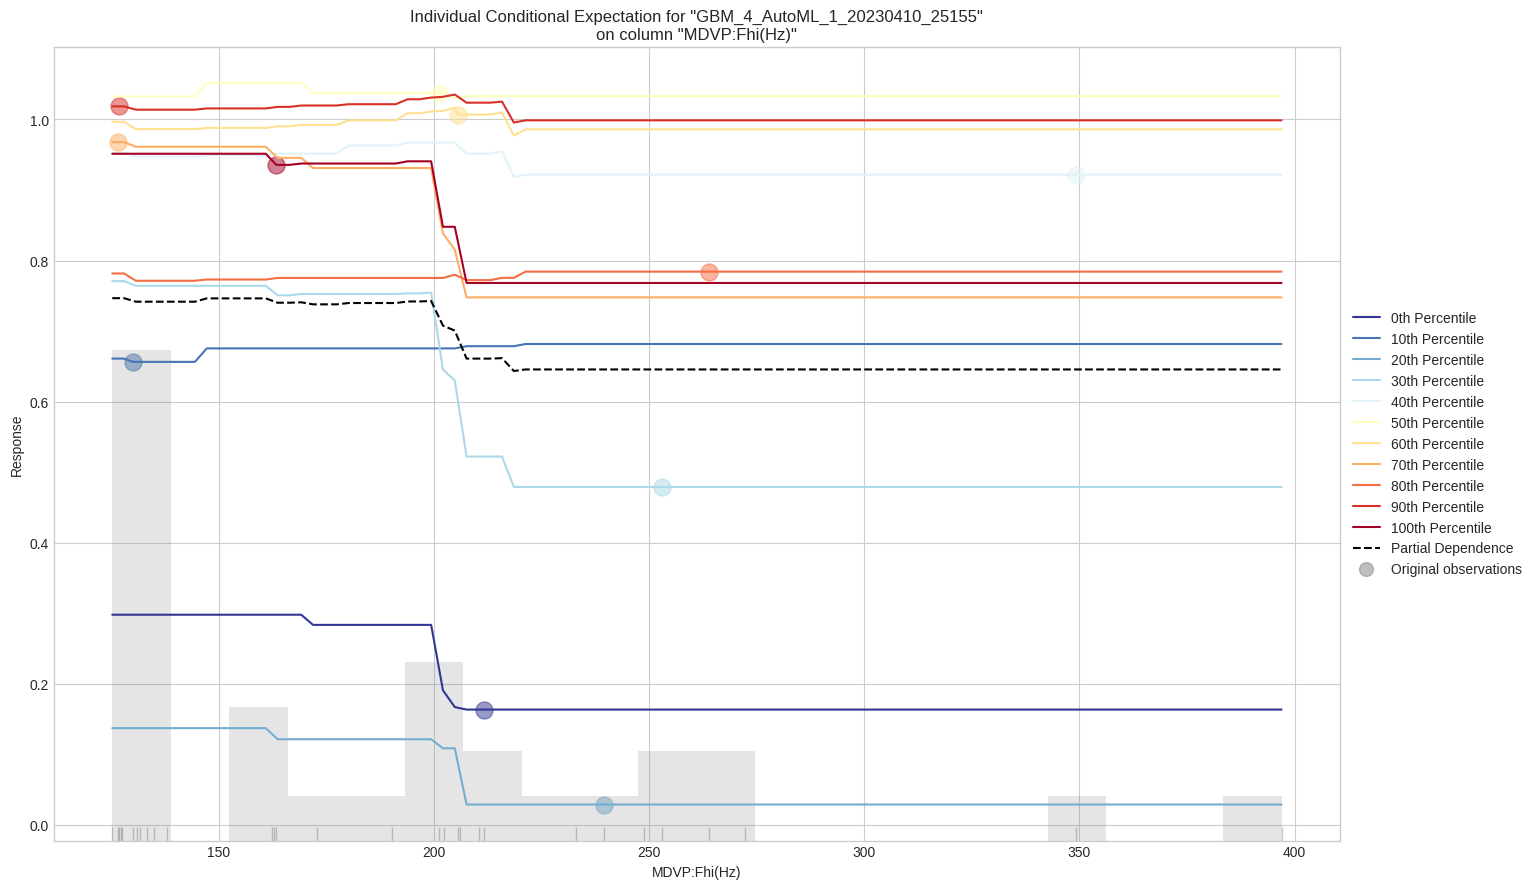

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [111]:
aml.leader.explain(df_test)

**Observations:**<br>
1.**What is the question?**<br>
**Ans.** The problem that we are trying to solve here is to predict the Parkinson disease **status** and checking the best suitable algorithm using SHAP analysis and AutoML techniques.<br>
2.**What did you do?**<br>
**Ans.** We first used various feature selection techniques like <br>
Pearson's correlation<br>
K Best features<br>
Sequential feature selection<br>
AutoML<br>
Then we used SHAP analysis using AutoML techniques to find the relationship among variables to find the insights on how it can impact the dependent variable.<br>
With these following techniques we found the most relevant independent variables for predicting the status of disease and their impact.<br>
3.**How well did it work?**<br>
**Ans.** From the above observations we found relevant independent variables like Spread1, PPE which have high impact on the target variable and the dataset was low bias and low variance. The RMSE is 0.11.<br>
4.**What did you learn?**<br>
**Ans.**From the above task we learnt the various ways of feature selection techniques and how to efficiently use these techniques to train models using various training models like logistic regression, decision trees and AutoML techinques.


###Resources
https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/<br>
https://medium.com/@data.science.enthusiast/feature-selection-techniques-forward-backward-wrapper-selection-9587f3c70cfa<br>
https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook<br>
https://medium.com/towards-data-science/a-practical-guide-to-feature-selection-using-sklearn-b3efa176bd96

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.